<b><font color="SteelBlue" size="+3">Segmentez des clients d'un site e-commerce</font></b>

# Introduction

## Contexte

Dans un environnement e-commerce compétitif, Olist, une entreprise brésilienne novatrice, initie un projet ambitieux pour améliorer son interaction avec sa clientèle. Cette initiative découle d'une volonté forte de mieux comprendre les comportements d'achat et les préférences des clients à travers une segmentation détaillée. L'entreprise s'engage dans cette voie en mettant en place une équipe Data dédiée, marquant ainsi son entrée dans le domaine de la Data Science. L'objectif est d'exploiter un ensemble de données accumulées depuis janvier 2017, incluant l'historique des commandes, les retours de satisfaction, et plus encore, pour fournir aux équipes d'e-commerce des outils précis pour cibler leurs campagnes marketing.

## Objectifs

Le projet se concentre sur l'analyse approfondie des données disponibles pour révéler les divers profils de clients qui composent la base d'utilisateurs d'Olist. À travers des méthodes d'analyse non supervisées, l'objectif est de regrouper les clients en segments homogènes, fournissant ainsi un cadre clair pour la personnalisation des stratégies de communication. Cette segmentation vise à être dynamique, capable d'évoluer au fil du temps pour s'adapter aux changements dans les comportements d'achat et les préférences des clients. Par conséquent, une composante essentielle du projet est la mise en place d'une stratégie de maintenance prédictive, avec une recommandation sur la fréquence à laquelle la segmentation devrait être révisée pour maintenir sa pertinence et soutenir un avantage concurrentiel durable pour Olist.

## Imports

In [1]:
# Chargement des librairies
# Builtin
import os

# Data
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import folium
from folium.plugins import HeatMap

from IPython.display import Image

## Data

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Brazil_Regions.png',
 'carte-bresil.jpg',
 'Carte_bresil.png',
 'data',
 'Deveau_Estelle_1_script_032024.sql',
 'Deveau_Estelle_2_notebook_exploratoire_032024.ipynb',
 'raf.txt',
 'svg']

In [3]:
os.listdir("data/sources/")

['Customer.csv',
 'CustomerCategoryCounts.csv',
 'CustomerPaymentPreferences.csv',
 'Script_projet.sql',
 'Script_projet2.sql',
 'svg_scripts']

In [4]:
path     = "./data/sources/"
filename1 = "Customer.csv"
filename2 = "CustomerPaymentPreferences.csv"
filename3 = "CustomerCategoryCounts.csv"

In [5]:
df_customer = pd.read_csv(path + filename1)
df_payment = pd.read_csv(path + filename2)
df_category = pd.read_csv(path + filename3)

In [6]:
# Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Quick tour

## Custumer

In [7]:
df_customer.head()

,customer_unique_id,customer_city,customer_state,geolocation_lat,geolocation_lng,FirstOrderDate,LastOrderDate,TotalOrders,TotalSpent,TotalFreight,AvgItems,item_count,AverageReviewScore,NumberOfReviews,NumberOfCommentTitles,NumberOfComments,DifferentCategories,MaxWeight
0,0000366f3b9a7992bf8c76cfdf3221e2,cajamar,SP,-23.340235,-46.830140,2018-05-10 10:56:27,2018-05-10 10:56:27,1,129.90,12.00,1.0,1,5.0,1.0,1.0,1.0,1,1500.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,osasco,SP,-23.559115,-46.787626,2018-05-07 11:11:27,2018-05-07 11:11:27,1,18.90,8.29,1.0,1,4.0,1.0,0.0,0.0,1,375.0
2,0000f46a3911fa3c0805444483337064,sao jose,SC,-27.542880,-48.633426,2017-03-10 21:05:03,2017-03-10 21:05:03,1,69.00,17.22,1.0,1,3.0,1.0,0.0,0.0,1,1500.0
3,0000f6ccb0745a6a4b88665a16c9f078,belem,PA,-1.312214,-48.483159,2017-10-12 20:29:41,2017-10-12 20:29:41,1,25.99,17.63,1.0,1,4.0,1.0,0.0,1.0,1,150.0
4,0004aac84e0df4da2b147fca70cf8255,sorocaba,SP,-23.505548,-47.469705,2017-11-14 19:45:42,2017-11-14 19:45:42,1,180.00,16.89,1.0,1,5.0,1.0,0.0,0.0,1,6050.0


In [8]:
df_customer.shape

(95414, 18)

In [9]:
df_customer.dtypes.value_counts()

float64    10
object      5
int64       3
Name: count, dtype: int64

In [10]:
df_customer.describe()

,geolocation_lat,geolocation_lng,TotalOrders,TotalSpent,TotalFreight,AvgItems,item_count,AverageReviewScore,NumberOfReviews,NumberOfCommentTitles,NumberOfComments,DifferentCategories,MaxWeight
count,95149.000000,95149.000000,95414.000000,95414.000000,95414.000000,95414.000000,95414.000000,94715.000000,94715.000000,94715.000000,94715.000000,95414.000000,95401.000000
mean,-21.176685,-46.170823,1.034607,142.428113,23.600066,1.139099,1.138638,4.102604,1.040120,0.121438,0.427419,1.011005,2161.514250
std,5.625211,4.061048,0.213072,217.635016,22.879294,0.526888,0.530757,1.326182,0.253979,0.333388,0.524419,0.205172,3829.132828
min,-33.689948,-72.668881,1.000000,0.850000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,-23.589119,-48.107784,1.000000,47.900000,14.080000,1.000000,1.000000,4.000000,1.000000,0.000000,0.000000,1.000000,300.000000
50%,-22.923671,-46.630609,1.000000,89.900000,17.600000,1.000000,1.000000,5.000000,1.000000,0.000000,0.000000,1.000000,700.000000
75%,-20.110674,-43.591752,1.000000,155.000000,25.540000,1.000000,1.000000,5.000000,1.000000,0.000000,1.000000,1.000000,1850.000000
max,42.184003,-8.723762,16.000000,13440.000000,1794.960000,21.000000,21.000000,5.000000,16.000000,4.000000,7.000000,5.000000,40425.000000


In [11]:
df_customer[df_customer['customer_unique_id'] == '001ae44fa04911a9e9577356dce6c63c']

,customer_unique_id,customer_city,customer_state,geolocation_lat,geolocation_lng,FirstOrderDate,LastOrderDate,TotalOrders,TotalSpent,TotalFreight,AvgItems,item_count,AverageReviewScore,NumberOfReviews,NumberOfCommentTitles,NumberOfComments,DifferentCategories,MaxWeight
44,001ae44fa04911a9e9577356dce6c63c,sao caetano do sul,SP,-23.635292,-46.578288,2017-11-06 17:35:49,2017-11-06 17:35:49,1,99.9,16.33,1.0,1,NaN,NaN,NaN,NaN,1,6600.0


In [12]:
df_customer.nunique()

customer_unique_id       95414
customer_city             4110
customer_state              27
geolocation_lat          14812
geolocation_lng          14812
FirstOrderDate           95159
LastOrderDate            95156
TotalOrders                  9
TotalSpent                8391
TotalFreight              8169
AvgItems                    39
item_count                  17
AverageReviewScore          32
NumberOfReviews              9
NumberOfCommentTitles        5
NumberOfComments             8
DifferentCategories          6
MaxWeight                 2182
dtype: int64

In [13]:
# Valeurs manquantes
missing_values_count = df_customer.isnull().sum()
total_cells = np.product(df_customer.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print('Le pourcentage de valeurs manquantes est de', round(percent_missing, 2),'%')

Le pourcentage de valeurs manquantes est de 0.19 %


In [14]:
percent_missing_values =  round((missing_values_count / len(df_customer)) * 100, 2)
missing_data = pd.concat([missing_values_count, percent_missing_values], axis=1, keys=['Nombre de valeurs manquantes', 'Pourcentage de valeurs manquantes'])
display(missing_data)

,Nombre de valeurs manquantes,Pourcentage de valeurs manquantes
customer_unique_id,0,0.00
customer_city,0,0.00
customer_state,0,0.00
geolocation_lat,265,0.28
geolocation_lng,265,0.28
FirstOrderDate,0,0.00
LastOrderDate,0,0.00
TotalOrders,0,0.00
TotalSpent,0,0.00
TotalFreight,0,0.00


<Axes: title={'center': 'Valeurs présentes dans notre jeu de données'}>

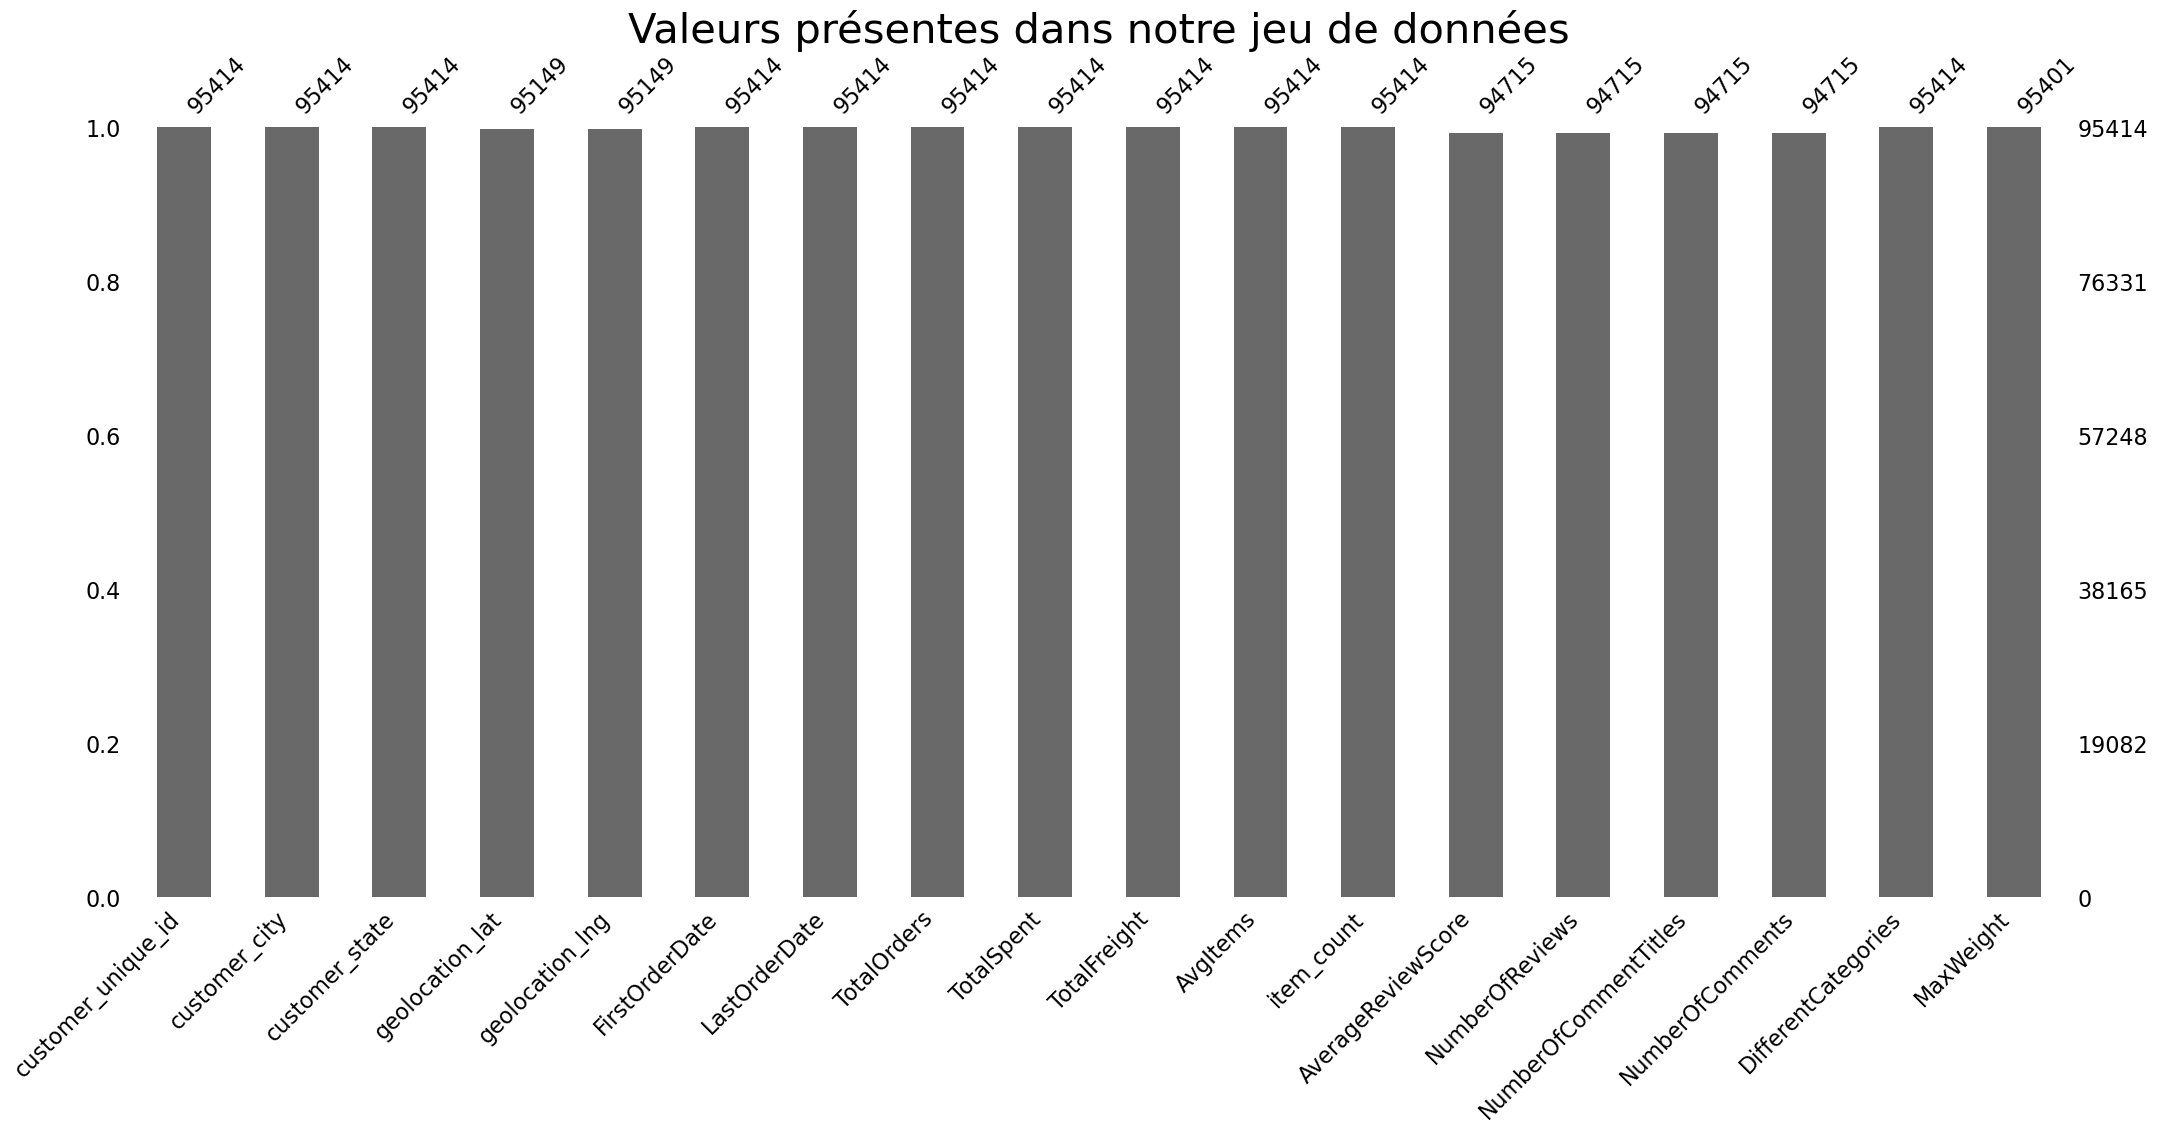

In [15]:
plt.title("Valeurs présentes dans notre jeu de données", fontsize=30)
msno.bar(df_customer)

<Axes: >

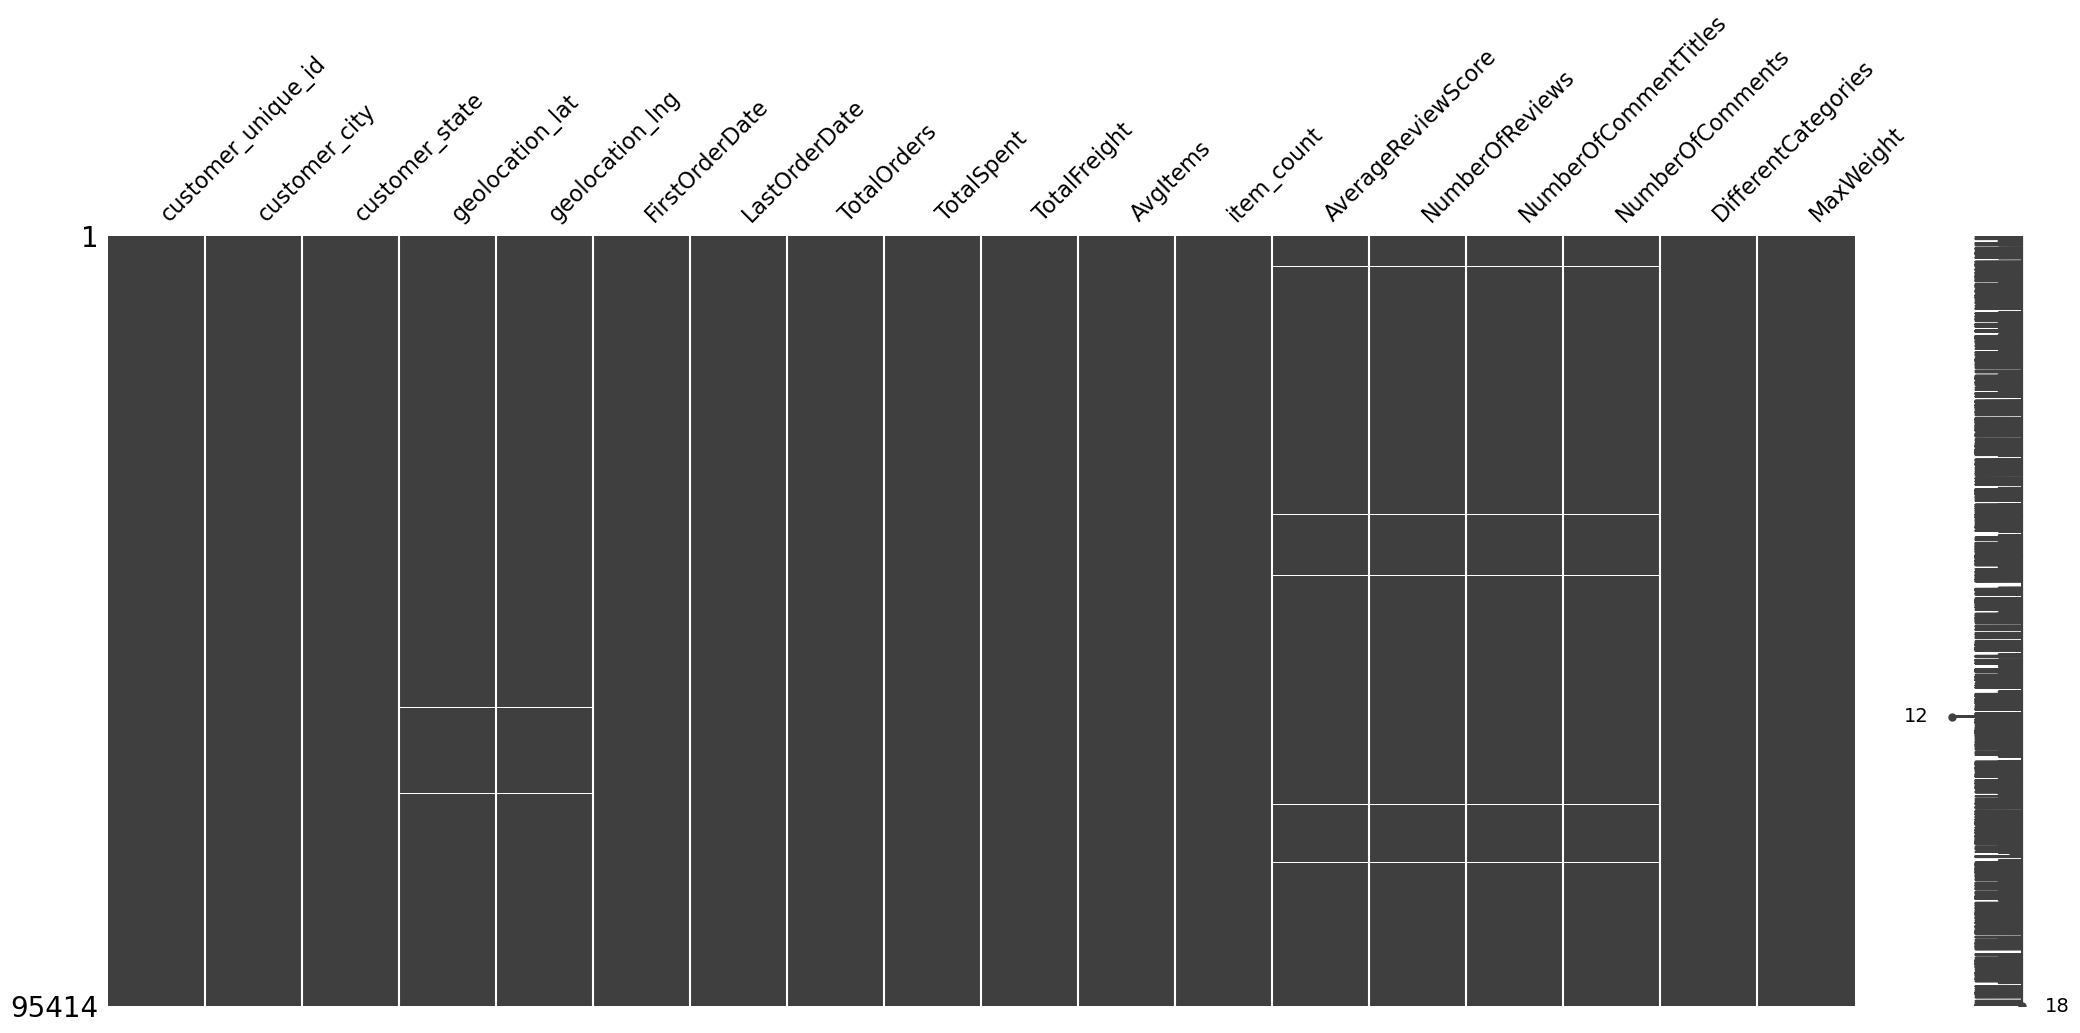

In [16]:
msno.matrix(df_customer)

## CustumerPaymentPreferences

In [17]:
df_payment.head()

,customer_unique_id,payment_type,PaymentCount,TotalPaymentValue
0,0000366f3b9a7992bf8c76cfdf3221e2,credit_card,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,credit_card,1,27.19
2,0000f46a3911fa3c0805444483337064,credit_card,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,credit_card,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,credit_card,1,196.89


In [18]:
df_payment.shape

(98657, 4)

In [19]:
df_payment.dtypes.value_counts()

object     2
int64      1
float64    1
Name: count, dtype: int64

In [20]:
df_payment.describe()

,PaymentCount,TotalPaymentValue
count,98657.000000,98657.000000
mean,1.052992,162.267415
std,0.398400,227.502178
min,1.000000,0.000000
25%,1.000000,60.470000
50%,1.000000,105.010000
75%,1.000000,178.820000
max,33.000000,13664.080000


In [21]:
df_payment.nunique()

customer_unique_id    96094
payment_type              5
PaymentCount             21
TotalPaymentValue     29186
dtype: int64

In [22]:
# Valeurs manquantes
missing_values_count = df_payment.isnull().sum()
total_cells = np.product(df_payment.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print('Le pourcentage de valeurs manquantes est de', round(percent_missing, 2),'%')

Le pourcentage de valeurs manquantes est de 0.0 %


In [23]:
percent_missing_values =  round((missing_values_count / len(df_payment)) * 100, 2)
missing_data = pd.concat([missing_values_count, percent_missing_values], axis=1, keys=['Nombre de valeurs manquantes', 'Pourcentage de valeurs manquantes'])
display(missing_data)

,Nombre de valeurs manquantes,Pourcentage de valeurs manquantes
customer_unique_id,0,0.0
payment_type,0,0.0
PaymentCount,0,0.0
TotalPaymentValue,0,0.0


## CustumerCategoryCounts

In [24]:
df_category.head()

,customer_unique_id,product_category_name_english,CategoryCount,TotalSpentPerCategory
0,0000366f3b9a7992bf8c76cfdf3221e2,bed_bath_table,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,health_beauty,1,18.90
2,0000f46a3911fa3c0805444483337064,stationery,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,telephony,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,telephony,1,180.00


In [25]:
df_category.shape

(97909, 4)

In [26]:
df_category.dtypes.value_counts()

object     2
int64      1
float64    1
Name: count, dtype: int64

In [27]:
df_category.describe()

,CategoryCount,TotalSpentPerCategory
count,97909.000000,97909.000000
mean,1.150487,138.798640
std,0.568281,213.996102
min,1.000000,0.850000
25%,1.000000,45.900000
50%,1.000000,87.000000
75%,1.000000,149.990000
max,24.000000,13440.000000


In [28]:
df_category.nunique()

customer_unique_id               95414
product_category_name_english       72
CategoryCount                       19
TotalSpentPerCategory             7698
dtype: int64

In [29]:
# Valeurs manquantes
missing_values_count = df_category.isnull().sum()
total_cells = np.product(df_category.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print('Le pourcentage de valeurs manquantes est de', round(percent_missing, 2),'%')

Le pourcentage de valeurs manquantes est de 0.0 %


In [30]:
percent_missing_values =  round((missing_values_count / len(df_category)) * 100, 2)
missing_data = pd.concat([missing_values_count, percent_missing_values], axis=1, keys=['Nombre de valeurs manquantes', 'Pourcentage de valeurs manquantes'])
display(missing_data)

,Nombre de valeurs manquantes,Pourcentage de valeurs manquantes
customer_unique_id,0,0.0
product_category_name_english,0,0.0
CategoryCount,0,0.0
TotalSpentPerCategory,0,0.0


## Liens

Les 3 dataframes contiennent le customer_unique_id ce qui va nous permettre de merger ces données.

# Merge des données

La stratégie va être d'apporter plus de features au df_custumer grace aux informations contenues dans les deux autres dataframe.<br> 
Nous allons ajouter pour chaque client : <br>
- le moyen de paiement "préféré", à savoir celui avec lequel ils ont le plus payé
- le taux de paimement en voucher 
- le nombre de catégories différentes achetées
- la catégorie "préférée", à savoir celle dans laquelle ils ont le plus dépensé

## Merge Paiement

In [31]:
print("Valeurs uniques pour payment_type dans df_payment:", df_payment['payment_type'].unique())

Valeurs uniques pour payment_type dans df_payment: ['credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined']


In [32]:
# Calculer la somme totale des paiements pour chaque client
total_payment_by_customer = df_payment.groupby('customer_unique_id')['TotalPaymentValue'].sum().rename('TotalPaymentValue_total').reset_index()

# Pivot pour obtenir le pourcentage par type de paiement pour chaque client
df_payment_pivot = df_payment.pivot_table(index='customer_unique_id', 
                                          columns='payment_type', 
                                          values='TotalPaymentValue', 
                                          aggfunc='sum',
                                          fill_value=0)

# Calculer les pourcentages de paiement pour chaque type
for col in df_payment_pivot.columns:
    df_payment_pivot[col + '_pct'] = df_payment_pivot[col] / total_payment_by_customer.set_index('customer_unique_id')['TotalPaymentValue_total'] * 100

# Ajouter la somme totale des paiements par client au DataFrame pivoté
df_payment_pivot = df_payment_pivot.merge(total_payment_by_customer, on='customer_unique_id')

df_payment_pivot.head()


,customer_unique_id,boleto,credit_card,debit_card,not_defined,voucher,boleto_pct,credit_card_pct,debit_card_pct,not_defined_pct,voucher_pct,TotalPaymentValue_total
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,141.90,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,27.19,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,27.19
2,0000f46a3911fa3c0805444483337064,0.0,86.22,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,43.62,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,43.62
4,0004aac84e0df4da2b147fca70cf8255,0.0,196.89,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,196.89


In [33]:
# Fusionner df_customer avec les colonnes sélectionnées de df_payment_pivot
df_merged = pd.merge(df_customer,
                     df_payment_pivot[['customer_unique_id','boleto_pct','credit_card_pct','debit_card_pct','not_defined_pct','voucher_pct','TotalPaymentValue_total']],
                     on='customer_unique_id',
                     how='left')

df_merged.head(5)

,customer_unique_id,customer_city,customer_state,geolocation_lat,geolocation_lng,FirstOrderDate,LastOrderDate,TotalOrders,TotalSpent,TotalFreight,AvgItems,item_count,AverageReviewScore,NumberOfReviews,NumberOfCommentTitles,NumberOfComments,DifferentCategories,MaxWeight,boleto_pct,credit_card_pct,debit_card_pct,not_defined_pct,voucher_pct,TotalPaymentValue_total
0,0000366f3b9a7992bf8c76cfdf3221e2,cajamar,SP,-23.340235,-46.830140,2018-05-10 10:56:27,2018-05-10 10:56:27,1,129.90,12.00,1.0,1,5.0,1.0,1.0,1.0,1,1500.0,0.0,100.0,0.0,0.0,0.0,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,osasco,SP,-23.559115,-46.787626,2018-05-07 11:11:27,2018-05-07 11:11:27,1,18.90,8.29,1.0,1,4.0,1.0,0.0,0.0,1,375.0,0.0,100.0,0.0,0.0,0.0,27.19
2,0000f46a3911fa3c0805444483337064,sao jose,SC,-27.542880,-48.633426,2017-03-10 21:05:03,2017-03-10 21:05:03,1,69.00,17.22,1.0,1,3.0,1.0,0.0,0.0,1,1500.0,0.0,100.0,0.0,0.0,0.0,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,belem,PA,-1.312214,-48.483159,2017-10-12 20:29:41,2017-10-12 20:29:41,1,25.99,17.63,1.0,1,4.0,1.0,0.0,1.0,1,150.0,0.0,100.0,0.0,0.0,0.0,43.62
4,0004aac84e0df4da2b147fca70cf8255,sorocaba,SP,-23.505548,-47.469705,2017-11-14 19:45:42,2017-11-14 19:45:42,1,180.00,16.89,1.0,1,5.0,1.0,0.0,0.0,1,6050.0,0.0,100.0,0.0,0.0,0.0,196.89


## Merge catégories

In [34]:
# Compter le nombre de lignes où 'DifferentCategories' est égal à 0
count_different_categories_zero = (df_category['CategoryCount'] == 0).sum()
print(f"Nombre de lignes où 'DifferentCategories' = 0 : {count_different_categories_zero}")

Nombre de lignes où 'DifferentCategories' = 0 : 0


In [35]:
print("Valeurs uniques pour payment_type dans df_category:", df_category['product_category_name_english'].unique())

Valeurs uniques pour payment_type dans df_category: ['bed_bath_table' 'health_beauty' 'stationery' 'telephony' 'garden_tools'
 'sports_leisure' 'fashion_bags_accessories' 'luggage_accessories'
 'computers_accessories' 'fashion_underwear_beach' 'home_appliances'
 'musical_instruments' 'toys' 'home_confort' 'housewares'
 'small_appliances' 'watches_gifts' 'electronics' 'furniture_living_room'
 'pet_shop' 'office_furniture' 'auto' 'furniture_decor' 'perfumery'
 'construction_tools_construction' 'drinks' 'books_general_interest'
 'consoles_games' 'cool_stuff' 'christmas_supplies' 'baby' 'Miscellaneous'
 'home_construction' 'home_appliances_2' 'fixed_telephony' 'flowers'
 'books_imported' 'construction_tools_safety' 'diapers_and_hygiene'
 'fashion_shoes' 'kitchen_dining_laundry_garden_furniture' 'art'
 'food_drink' 'food' 'books_technical' 'industry_commerce_and_business'
 'audio' 'construction_tools_lights' 'signaling_and_security'
 'market_place' 'fashion_male_clothing' 'cine_photo'
 'cos

In [36]:
super_categories_dict = {
    'Home': [
        'bed_bath_table', 'garden_tools', 'furniture_living_room', 
        'home_confort', 'housewares', 'home_construction', 
        'kitchen_dining_laundry_garden_furniture', 'furniture_decor', 
        'flowers', 'arts_and_craftmanship', 'furniture_bedroom', 
        'furniture_mattress_and_upholstery', 'home_comfort_2', 
        'home_appliances', 'home_appliances_2', 'small_appliances', 
        'small_appliances_home_oven_and_coffee', 'air_conditioning',
        'cool_stuff', 'christmas_supplies', 'party_supplies'
    ],
    'PersonalCare_Beauty': [
        'health_beauty', 'perfumery', 'diapers_and_hygiene'
    ],
    'Fashion': [
        'fashion_bags_accessories', 'luggage_accessories', 
        'fashion_underwear_beach', 'watches_gifts', 'fashion_shoes', 
        'fashion_male_clothing', 'fashio_female_clothing', 
        'fashion_childrens_clothes', 'fashion_sport'
    ],
    'Technology_Electronics': [
        'telephony', 'computers_accessories', 'electronics', 
        'computers', 'audio', 'fixed_telephony', 'tablets_printing_image'
    ],
    'Sports_Leisure': [
        'sports_leisure', 'musical_instruments', 'toys', 
        'consoles_games', 'cine_photo', 'dvds_blu_ray', 
        'cds_dvds_musicals', 'music'
    ],
    'Food_Drink': [
        'drinks', 'food_drink', 'food', 'la_cuisine'
    ],
    'Books': [
        'books_general_interest', 'books_imported', 'books_technical'
    ],
    'Baby': [
        'baby'
    ],
    'Pets': [
        'pet_shop'
    ],
    'Auto': [
        'auto'
    ],
    'Construction': [
        'construction_tools_construction', 'construction_tools_safety', 
        'construction_tools_lights', 'costruction_tools_garden', 
        'costruction_tools_tools'
    ],
    'Business': [
        'industry_commerce_and_business', 'agro_industry_and_commerce',
        'market_place', 'signaling_and_security', 'security_and_services'
    ],
    'Office': [
        'office_furniture', 'stationery'
    ],
    'Miscellaneous': [
        'cool_stuff', 'christmas_supplies', 'party_supplies', 'Miscellaneous', 'art'
    ]
}


In [37]:
# Appliquer le dictionnaire inversé pour créer une nouvelle colonne de super catégories
category_to_super_category_dict = {}
for super_cat, cats in super_categories_dict.items():
    for cat in cats:
        category_to_super_category_dict[cat] = super_cat

# Appliquer le dictionnaire inversé pour créer une nouvelle colonne de super catégories
df_category['super_category'] = df_category['product_category_name_english'].map(category_to_super_category_dict)


In [38]:
nan_count = df_category['super_category'].isna().sum()

print(f"Nombre de valeurs NaN dans la colonne 'super_category': {nan_count}")

Nombre de valeurs NaN dans la colonne 'super_category': 0


In [39]:
df_category.head(5)

,customer_unique_id,product_category_name_english,CategoryCount,TotalSpentPerCategory,super_category
0,0000366f3b9a7992bf8c76cfdf3221e2,bed_bath_table,1,129.90,Home
1,0000b849f77a49e4a4ce2b2a4ca5be3f,health_beauty,1,18.90,PersonalCare_Beauty
2,0000f46a3911fa3c0805444483337064,stationery,1,69.00,Office
3,0000f6ccb0745a6a4b88665a16c9f078,telephony,1,25.99,Technology_Electronics
4,0004aac84e0df4da2b147fca70cf8255,telephony,1,180.00,Technology_Electronics


In [40]:
# Calculer la somme totale des paiements pour chaque client
totalSpentPerCategory_by_customer = df_category.groupby('customer_unique_id')['TotalSpentPerCategory'].sum().rename('TotalSpentPerCategory_total').reset_index()

# Pivot pour obtenir le pourcentage par type de paiement pour chaque client
df_cat_pivot = df_category.pivot_table(index='customer_unique_id', 
                                          columns='super_category', 
                                          values='TotalSpentPerCategory', 
                                          aggfunc='sum',
                                          fill_value=0)

# Calculer les pourcentages pour chaque cat
for col in df_cat_pivot.columns:
    df_cat_pivot[col + '_pct'] = df_cat_pivot[col] / totalSpentPerCategory_by_customer.set_index('customer_unique_id')['TotalSpentPerCategory_total'] * 100

# Ajouter la somme totale des paiements par client au DataFrame pivoté
df_cat_pivot = df_cat_pivot.merge(totalSpentPerCategory_by_customer, on='customer_unique_id')

df_cat_pivot.head()

,customer_unique_id,Auto,Baby,Books,Business,Construction,Fashion,Food_Drink,Home,Miscellaneous,Office,PersonalCare_Beauty,Pets,Sports_Leisure,Technology_Electronics,Auto_pct,Baby_pct,Books_pct,Business_pct,Construction_pct,Fashion_pct,Food_Drink_pct,Home_pct,Miscellaneous_pct,Office_pct,PersonalCare_Beauty_pct,Pets_pct,Sports_Leisure_pct,Technology_Electronics_pct,TotalSpentPerCategory_total
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129.9,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.9,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,18.90
2,0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,25.99
4,0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,180.00


In [41]:
# Fusionner df_merged avec les colonnes sélectionnées de df_category_pivot
df_merged = pd.merge(df_merged,
                     df_cat_pivot[['customer_unique_id','Auto_pct','Baby_pct','Books_pct','Business_pct','Construction_pct','Fashion_pct','Food_Drink_pct','Home_pct','Miscellaneous_pct','Office_pct','PersonalCare_Beauty_pct','Pets_pct','Sports_Leisure_pct','Technology_Electronics_pct','TotalSpentPerCategory_total']],
                     on='customer_unique_id',
                     how='left')

df_merged.head(5)

,customer_unique_id,customer_city,customer_state,geolocation_lat,geolocation_lng,FirstOrderDate,LastOrderDate,TotalOrders,TotalSpent,TotalFreight,AvgItems,item_count,AverageReviewScore,NumberOfReviews,NumberOfCommentTitles,NumberOfComments,DifferentCategories,MaxWeight,boleto_pct,credit_card_pct,debit_card_pct,not_defined_pct,voucher_pct,TotalPaymentValue_total,Auto_pct,Baby_pct,Books_pct,Business_pct,Construction_pct,Fashion_pct,Food_Drink_pct,Home_pct,Miscellaneous_pct,Office_pct,PersonalCare_Beauty_pct,Pets_pct,Sports_Leisure_pct,Technology_Electronics_pct,TotalSpentPerCategory_total
0,0000366f3b9a7992bf8c76cfdf3221e2,cajamar,SP,-23.340235,-46.830140,2018-05-10 10:56:27,2018-05-10 10:56:27,1,129.90,12.00,1.0,1,5.0,1.0,1.0,1.0,1,1500.0,0.0,100.0,0.0,0.0,0.0,141.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,osasco,SP,-23.559115,-46.787626,2018-05-07 11:11:27,2018-05-07 11:11:27,1,18.90,8.29,1.0,1,4.0,1.0,0.0,0.0,1,375.0,0.0,100.0,0.0,0.0,0.0,27.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,18.90
2,0000f46a3911fa3c0805444483337064,sao jose,SC,-27.542880,-48.633426,2017-03-10 21:05:03,2017-03-10 21:05:03,1,69.00,17.22,1.0,1,3.0,1.0,0.0,0.0,1,1500.0,0.0,100.0,0.0,0.0,0.0,86.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,belem,PA,-1.312214,-48.483159,2017-10-12 20:29:41,2017-10-12 20:29:41,1,25.99,17.63,1.0,1,4.0,1.0,0.0,1.0,1,150.0,0.0,100.0,0.0,0.0,0.0,43.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,25.99
4,0004aac84e0df4da2b147fca70cf8255,sorocaba,SP,-23.505548,-47.469705,2017-11-14 19:45:42,2017-11-14 19:45:42,1,180.00,16.89,1.0,1,5.0,1.0,0.0,0.0,1,6050.0,0.0,100.0,0.0,0.0,0.0,196.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,180.00


# Nettoyage des Données

In [42]:
df_merged.shape

(95414, 39)

In [43]:
# Calculer le nombre de lignes où les catégories préférées par valeur et par compte sont différentes
different_comment_count = df_merged[df_merged['NumberOfCommentTitles'] != df_merged['NumberOfComments']].shape[0]

print(f"Nombre de lignes où le NumberOfCommentTitles par valeur est différente du NumberOfComments : {different_comment_count}")


Nombre de lignes où le NumberOfCommentTitles par valeur est différente du NumberOfComments : 32220


## Format des données

In [44]:
df_merged.dtypes

customer_unique_id              object
customer_city                   object
customer_state                  object
geolocation_lat                float64
geolocation_lng                float64
FirstOrderDate                  object
LastOrderDate                   object
TotalOrders                      int64
TotalSpent                     float64
TotalFreight                   float64
AvgItems                       float64
item_count                       int64
AverageReviewScore             float64
NumberOfReviews                float64
NumberOfCommentTitles          float64
NumberOfComments               float64
DifferentCategories              int64
MaxWeight                      float64
boleto_pct                     float64
credit_card_pct                float64
debit_card_pct                 float64
not_defined_pct                float64
voucher_pct                    float64
TotalPaymentValue_total        float64
Auto_pct                       float64
Baby_pct                 

In [45]:
df_merged['FirstOrderDate'] = pd.to_datetime(df_merged['FirstOrderDate'])
df_merged['LastOrderDate'] = pd.to_datetime(df_merged['LastOrderDate'])

In [46]:
df_merged.dtypes

customer_unique_id                     object
customer_city                          object
customer_state                         object
geolocation_lat                       float64
geolocation_lng                       float64
FirstOrderDate                 datetime64[ns]
LastOrderDate                  datetime64[ns]
TotalOrders                             int64
TotalSpent                            float64
TotalFreight                          float64
AvgItems                              float64
item_count                              int64
AverageReviewScore                    float64
NumberOfReviews                       float64
NumberOfCommentTitles                 float64
NumberOfComments                      float64
DifferentCategories                     int64
MaxWeight                             float64
boleto_pct                            float64
credit_card_pct                       float64
debit_card_pct                        float64
not_defined_pct                   

In [47]:
df_merged.head()

,customer_unique_id,customer_city,customer_state,geolocation_lat,geolocation_lng,FirstOrderDate,LastOrderDate,TotalOrders,TotalSpent,TotalFreight,AvgItems,item_count,AverageReviewScore,NumberOfReviews,NumberOfCommentTitles,NumberOfComments,DifferentCategories,MaxWeight,boleto_pct,credit_card_pct,debit_card_pct,not_defined_pct,voucher_pct,TotalPaymentValue_total,Auto_pct,Baby_pct,Books_pct,Business_pct,Construction_pct,Fashion_pct,Food_Drink_pct,Home_pct,Miscellaneous_pct,Office_pct,PersonalCare_Beauty_pct,Pets_pct,Sports_Leisure_pct,Technology_Electronics_pct,TotalSpentPerCategory_total
0,0000366f3b9a7992bf8c76cfdf3221e2,cajamar,SP,-23.340235,-46.830140,2018-05-10 10:56:27,2018-05-10 10:56:27,1,129.90,12.00,1.0,1,5.0,1.0,1.0,1.0,1,1500.0,0.0,100.0,0.0,0.0,0.0,141.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,osasco,SP,-23.559115,-46.787626,2018-05-07 11:11:27,2018-05-07 11:11:27,1,18.90,8.29,1.0,1,4.0,1.0,0.0,0.0,1,375.0,0.0,100.0,0.0,0.0,0.0,27.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,18.90
2,0000f46a3911fa3c0805444483337064,sao jose,SC,-27.542880,-48.633426,2017-03-10 21:05:03,2017-03-10 21:05:03,1,69.00,17.22,1.0,1,3.0,1.0,0.0,0.0,1,1500.0,0.0,100.0,0.0,0.0,0.0,86.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,belem,PA,-1.312214,-48.483159,2017-10-12 20:29:41,2017-10-12 20:29:41,1,25.99,17.63,1.0,1,4.0,1.0,0.0,1.0,1,150.0,0.0,100.0,0.0,0.0,0.0,43.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,25.99
4,0004aac84e0df4da2b147fca70cf8255,sorocaba,SP,-23.505548,-47.469705,2017-11-14 19:45:42,2017-11-14 19:45:42,1,180.00,16.89,1.0,1,5.0,1.0,0.0,0.0,1,6050.0,0.0,100.0,0.0,0.0,0.0,196.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,180.00


## Recherche des doublons

In [48]:
nb_doublons_customer = df_merged.duplicated(subset=["customer_unique_id"]).sum()
print('Nombre de doublons sur le customer_unique_id :', nb_doublons_customer)

Nombre de doublons sur le customer_unique_id : 0


## Vérification des données

In [49]:
tolerance = 0.01

In [50]:
# Calculer la différence absolue entre TotalSpentPerCategory_total et TotalSpent
df_merged['spent_difference'] = abs(df_merged['TotalSpentPerCategory_total'] - df_merged['TotalSpent'])

# Calculer le seuil acceptable basé sur la tolérance et TotalSpent
df_merged['acceptable_difference'] = df_merged['TotalSpent'] * tolerance

# Compter les lignes où la différence est supérieure au seuil acceptable
count_rows = df_merged[df_merged['spent_difference'] > df_merged['acceptable_difference']].shape[0]

print(f"Nombre de lignes où TotalSpentPerCategory_total est différent de TotalSpent au-delà d'une tolérance de {tolerance*100}% : {count_rows}")


Nombre de lignes où TotalSpentPerCategory_total est différent de TotalSpent au-delà d'une tolérance de 1.0% : 0


In [51]:
# Compter le nombre de lignes où la somme des % des sommes dépensées dans chaque catégorie est significativement différente de 100
count_rows = df_payment_pivot[((df_payment_pivot['boleto_pct'] + df_payment_pivot['credit_card_pct'] + df_payment_pivot['debit_card_pct'] + df_payment_pivot['voucher_pct']) - 100) > tolerance].shape[0]

print(f"Nombre de lignes où la somme des % des moyens de paiement est significativement différente de 100 : {count_rows}")


Nombre de lignes où la somme des % des moyens de paiement est significativement différente de 100 : 0


In [52]:
# Compter le nombre de lignes où la somme des % des sommes dépensées dans chaque catégorie est significativement différente de 100
count_rows = df_merged[abs((df_merged['Auto_pct'] + df_merged['Baby_pct'] + df_merged['Books_pct'] + df_merged['Business_pct'] 
                        + df_merged['Construction_pct'] + df_merged['Fashion_pct'] + df_merged['Food_Drink_pct'] + df_merged['Home_pct'] 
                        + df_merged['Miscellaneous_pct'] + df_merged['Office_pct'] + df_merged['PersonalCare_Beauty_pct'] + df_merged['Pets_pct'] 
                        + df_merged['Sports_Leisure_pct'] + df_merged['Technology_Electronics_pct']) - 100) > tolerance].shape[0]

print(f"Nombre de lignes où la somme des % des sommes dépensées dans chaque catégorie est significativement différente de 100 : {count_rows}")


Nombre de lignes où la somme des % des sommes dépensées dans chaque catégorie est significativement différente de 100 : 0


In [53]:
# Calculer la différence absolue entre TotalPaymentValue_total et la somme de TotalSpent + TotalFreight
df_merged['payment_difference'] = abs(df_merged['TotalPaymentValue_total'] - (df_merged['TotalSpent'] + df_merged['TotalFreight']))

# Calculer le seuil acceptable basé sur la tolérance 
df_merged['acceptable_difference'] = df_merged['TotalPaymentValue_total'] * tolerance

# Compter les lignes où la différence est supérieure au seuil acceptable
count_rows = df_merged[df_merged['payment_difference'] > df_merged['acceptable_difference']].shape[0]

print(f"Nombre de lignes où TotalPaymentValue_total est différent de TotalSpent + TotalFreight au-delà d'une tolérance de {tolerance*100}% : {count_rows}")


Nombre de lignes où TotalPaymentValue_total est différent de TotalSpent + TotalFreight au-delà d'une tolérance de 1.0% : 337


In [54]:
# Supprimer les lignes où le paiement est incoherant
df_merged = df_merged[df_merged['payment_difference'] < df_merged['acceptable_difference']]

# Supprimer les lignes où 'AverageReviewScore' n'est pas compris entre 0 et 5
df_merged = df_merged.query("AverageReviewScore.isna() or (AverageReviewScore >= 0 and AverageReviewScore <= 5)")

# Supprimer les lignes où 'NumberOfComments' ou 'NumberOfCommentTitles' est supérieur à 'NumberOfReviews'
df_merged = df_merged.query("NumberOfComments <= NumberOfReviews and NumberOfCommentTitles <= NumberOfReviews")

# Remplacer les valeurs de 'DifferentCategories' égales à 0 par 1
df_merged.loc[df_merged['DifferentCategories'] == 0, 'DifferentCategories'] = 1


df_merged.shape

(94378, 42)

In [55]:
df_merged.columns

Index(['customer_unique_id', 'customer_city', 'customer_state',
       'geolocation_lat', 'geolocation_lng', 'FirstOrderDate', 'LastOrderDate',
       'TotalOrders', 'TotalSpent', 'TotalFreight', 'AvgItems', 'item_count',
       'AverageReviewScore', 'NumberOfReviews', 'NumberOfCommentTitles',
       'NumberOfComments', 'DifferentCategories', 'MaxWeight', 'boleto_pct',
       'credit_card_pct', 'debit_card_pct', 'not_defined_pct', 'voucher_pct',
       'TotalPaymentValue_total', 'Auto_pct', 'Baby_pct', 'Books_pct',
       'Business_pct', 'Construction_pct', 'Fashion_pct', 'Food_Drink_pct',
       'Home_pct', 'Miscellaneous_pct', 'Office_pct',
       'PersonalCare_Beauty_pct', 'Pets_pct', 'Sports_Leisure_pct',
       'Technology_Electronics_pct', 'TotalSpentPerCategory_total',
       'spent_difference', 'acceptable_difference', 'payment_difference'],
      dtype='object')

In [56]:
# Suppression des colonnes qui ne servaient qu'à la verification des données
df_merged = df_merged.drop(columns=['TotalPaymentValue_total', 'TotalSpentPerCategory_total', 'spent_difference', 
                      'acceptable_difference', 'payment_difference'])

## Traitement des valeurs manquantes

In [57]:
# Valeurs manquantes
missing_values_count = df_merged.isnull().sum()
total_cells = np.product(df_merged.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print('Le pourcentage de valeurs manquantes est de', round(percent_missing, 2),'%')

Le pourcentage de valeurs manquantes est de 0.02 %


In [58]:
percent_missing_values =  round((missing_values_count / len(df_merged)) * 100, 2)
missing_data = pd.concat([missing_values_count, percent_missing_values], axis=1, keys=['Nombre de valeurs manquantes', 'Pourcentage de valeurs manquantes'])
display(missing_data)

,Nombre de valeurs manquantes,Pourcentage de valeurs manquantes
customer_unique_id,0,0.00
customer_city,0,0.00
customer_state,0,0.00
geolocation_lat,264,0.28
geolocation_lng,264,0.28
FirstOrderDate,0,0.00
LastOrderDate,0,0.00
TotalOrders,0,0.00
TotalSpent,0,0.00
TotalFreight,0,0.00


<Axes: title={'center': 'Valeurs présentes dans notre jeu de données'}>

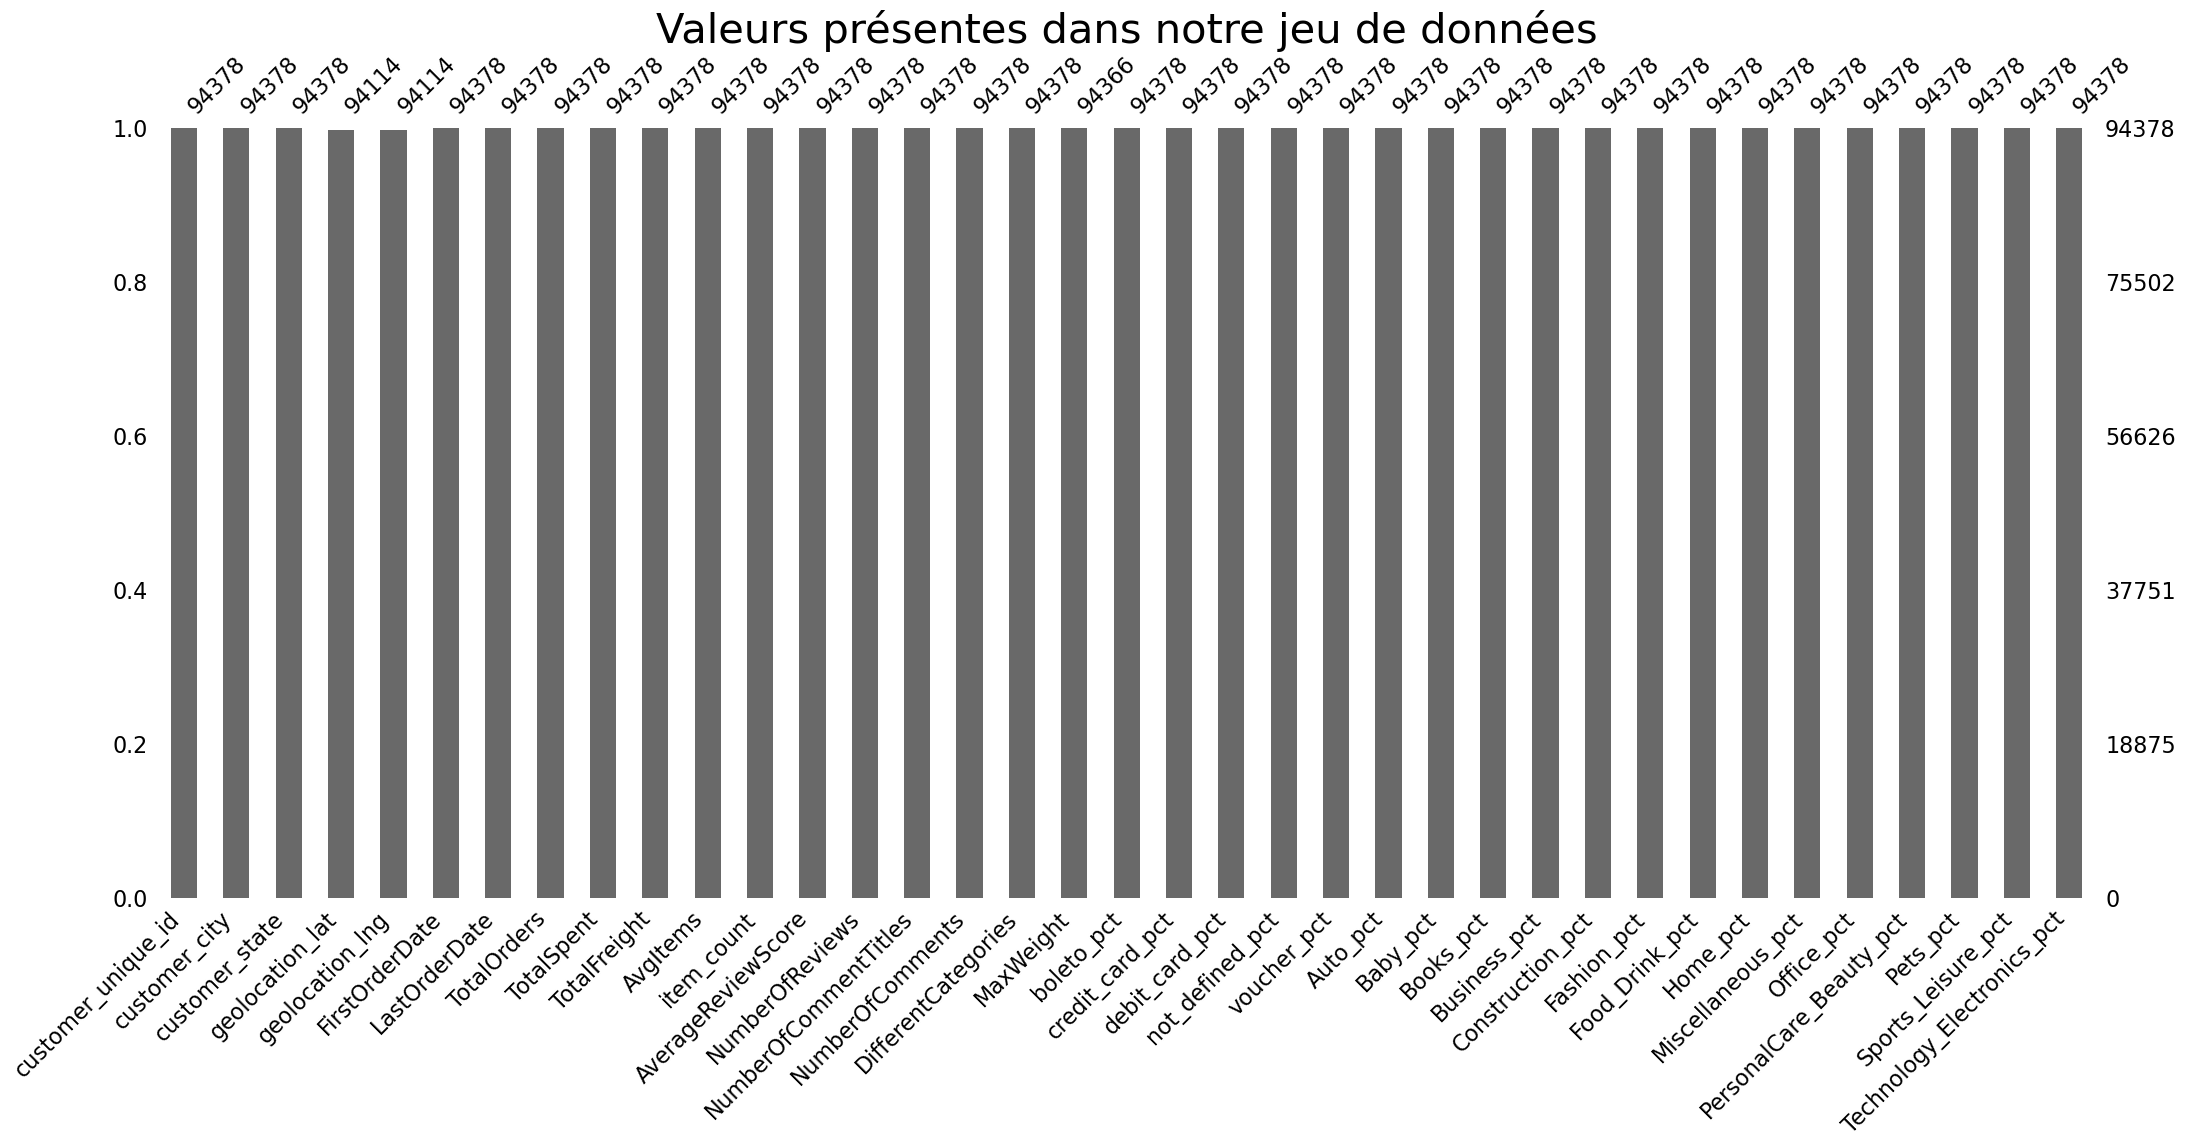

In [59]:
plt.title("Valeurs présentes dans notre jeu de données", fontsize=30)
msno.bar(df_merged)

In [60]:
# Supprimer les lignes où la colonne 'MaxWeight' est NaN
df_merged = df_merged.dropna(subset=['MaxWeight'])

In [61]:
df_merged.shape

(94366, 37)

In [62]:
# Valeurs manquantes
missing_values_count = df_merged.isnull().sum()
total_cells = np.product(df_merged.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print('Le pourcentage de valeurs manquantes est de', round(percent_missing, 2),'%')

Le pourcentage de valeurs manquantes est de 0.02 %


In [63]:
percent_missing_values =  round((missing_values_count / len(df_merged)) * 100, 2)
missing_data = pd.concat([missing_values_count, percent_missing_values], axis=1, keys=['Nombre de valeurs manquantes', 'Pourcentage de valeurs manquantes'])
display(missing_data)

,Nombre de valeurs manquantes,Pourcentage de valeurs manquantes
customer_unique_id,0,0.00
customer_city,0,0.00
customer_state,0,0.00
geolocation_lat,264,0.28
geolocation_lng,264,0.28
FirstOrderDate,0,0.00
LastOrderDate,0,0.00
TotalOrders,0,0.00
TotalSpent,0,0.00
TotalFreight,0,0.00


# Feature Engineering

In [64]:
df = df_merged.copy()
df.columns

Index(['customer_unique_id', 'customer_city', 'customer_state',
       'geolocation_lat', 'geolocation_lng', 'FirstOrderDate', 'LastOrderDate',
       'TotalOrders', 'TotalSpent', 'TotalFreight', 'AvgItems', 'item_count',
       'AverageReviewScore', 'NumberOfReviews', 'NumberOfCommentTitles',
       'NumberOfComments', 'DifferentCategories', 'MaxWeight', 'boleto_pct',
       'credit_card_pct', 'debit_card_pct', 'not_defined_pct', 'voucher_pct',
       'Auto_pct', 'Baby_pct', 'Books_pct', 'Business_pct', 'Construction_pct',
       'Fashion_pct', 'Food_Drink_pct', 'Home_pct', 'Miscellaneous_pct',
       'Office_pct', 'PersonalCare_Beauty_pct', 'Pets_pct',
       'Sports_Leisure_pct', 'Technology_Electronics_pct'],
      dtype='object')

## Récense d'achat

In [65]:
# Trouver la date de référence
reference_date = df['LastOrderDate'].max()

# Calculer la récence d'achat comme le nombre de jours depuis la dernière commande
df['Recency'] = (reference_date - df['LastOrderDate']).dt.days

print(df[['customer_unique_id', 'Recency']].head())

                 customer_unique_id  Recency
0  0000366f3b9a7992bf8c76cfdf3221e2      115
1  0000b849f77a49e4a4ce2b2a4ca5be3f      118
2  0000f46a3911fa3c0805444483337064      541
3  0000f6ccb0745a6a4b88665a16c9f078      325
4  0004aac84e0df4da2b147fca70cf8255      292


## Fréquence d'achat

In [66]:
# Calculer la période d'observation totale en années
observation_start = df['FirstOrderDate'].min()
observation_end = df['LastOrderDate'].max()
total_observation_period_years = (observation_end - observation_start).days / 365.25

# Calculer la fréquence pour chaque client
df['Frequency'] = df['TotalOrders'] / total_observation_period_years

# Afficher les résultats
print(df[['customer_unique_id', 'Frequency']].head())

                 customer_unique_id  Frequency
0  0000366f3b9a7992bf8c76cfdf3221e2   0.501717
1  0000b849f77a49e4a4ce2b2a4ca5be3f   0.501717
2  0000f46a3911fa3c0805444483337064   0.501717
3  0000f6ccb0745a6a4b88665a16c9f078   0.501717
4  0004aac84e0df4da2b147fca70cf8255   0.501717


## Montant et Sensibilité aux frais de ports

In [67]:
# Calcul du cout total prix + frais de ports
df['TotalAmount'] = df['TotalSpent'] + df['TotalFreight']

# Calcul du pourcentage représenté par les frais de port dans le prix total
df['TotalFreightPct'] = (df['TotalFreight'] / df['TotalAmount']) * 100
df['TotalFreightPct'] = df['TotalFreightPct'].fillna(0)

# Calcul du panierMoyen
df['AvgBasket'] = df['TotalSpent']/df['TotalOrders']

df = df.drop(columns=['TotalFreight', 'TotalSpent'])
# Afficher les premières lignes pour vérifier le résultat
print(df[['customer_unique_id', 'TotalFreightPct']].head())

                 customer_unique_id  TotalFreightPct
0  0000366f3b9a7992bf8c76cfdf3221e2         8.456660
1  0000b849f77a49e4a4ce2b2a4ca5be3f        30.489150
2  0000f46a3911fa3c0805444483337064        19.972164
3  0000f6ccb0745a6a4b88665a16c9f078        40.417240
4  0004aac84e0df4da2b147fca70cf8255         8.578394


## Indice d'engagement

In [68]:
# Calcul de l'indice global d'engagement des clients
df['EngagementIndex'] = (
    0.5 * df['NumberOfReviews'] +
    0.25 * df['NumberOfCommentTitles'] +
    0.25 * df['NumberOfComments']
) / (df['item_count'])

df['EngagementIndex'] = df['EngagementIndex'].fillna(0)
df = df.drop(columns=['NumberOfReviews','NumberOfCommentTitles','NumberOfComments'])

# Afficher les premières lignes pour vérifier le résultat
print(df[['customer_unique_id', 'EngagementIndex']].head())

                 customer_unique_id  EngagementIndex
0  0000366f3b9a7992bf8c76cfdf3221e2             1.00
1  0000b849f77a49e4a4ce2b2a4ca5be3f             0.50
2  0000f46a3911fa3c0805444483337064             0.50
3  0000f6ccb0745a6a4b88665a16c9f078             0.75
4  0004aac84e0df4da2b147fca70cf8255             0.50


## Position géographique

In [69]:
# Calculer la fréquence pour chaque position unique des customers
frequency_df = df.groupby(['geolocation_lat', 'geolocation_lng']).size().reset_index(name='number_of_customers')

In [70]:
# liste de points pour la heatmap
data_heatmap = frequency_df[['geolocation_lat', 'geolocation_lng', 'number_of_customers']].values.tolist()

# carte centrée sur la moyenne des coordonnées
map_center = [frequency_df['geolocation_lat'].mean(), frequency_df['geolocation_lng'].mean()]
map = folium.Map(location=map_center, zoom_start=5)

# Ajoutez la HeatMap à la carte avec un paramètre pour intensifier les couleurs en fonction du nombre de clients
HeatMap(data_heatmap, min_opacity=0.5,
        radius=10, blur=15, max_zoom=1).add_to(map)

# Affichez la carte
map

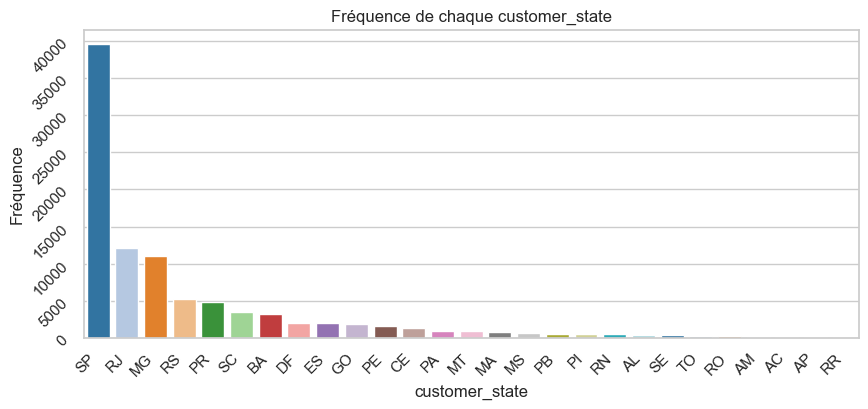

In [71]:
# Compter le nombre d'occurrences pour chaque customer_state
group_counts = df['customer_state'].value_counts().reset_index()
group_counts.columns = ['customer_state', 'Counts']

plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")

# Créer un graphique à barres
sns.barplot(x='customer_state', y='Counts', data=group_counts, hue='customer_state', palette="tab20", legend=False)

plt.yticks(rotation=45)

# Ajouter des titres et des labels
plt.title('Fréquence de chaque customer_state')
plt.ylabel('Fréquence')
plt.xlabel('customer_state')
plt.xticks(rotation=45, ha="right")

plt.show()

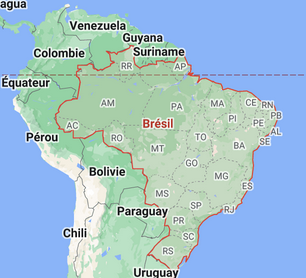

In [72]:
# Afficher les regions et etats
Image(filename="Carte_bresil.png", width=400, height=150)

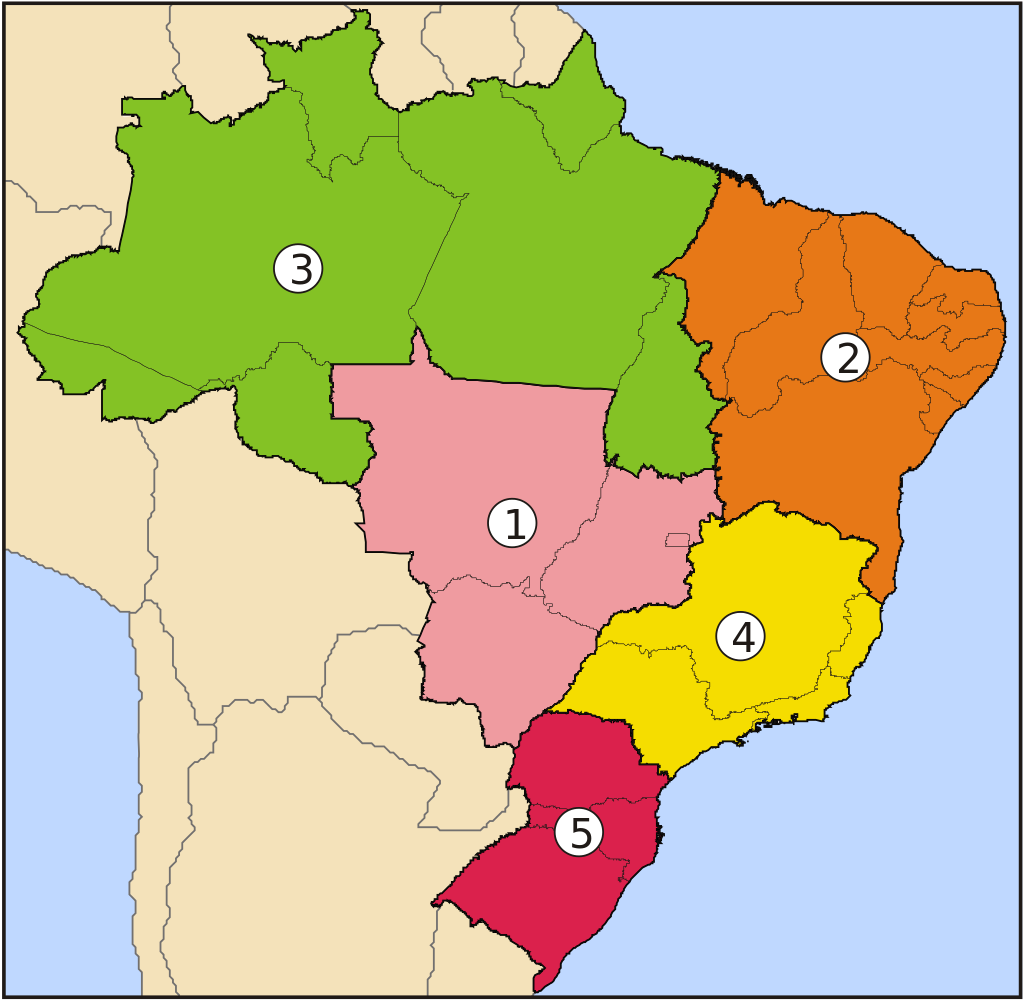

In [73]:
Image(filename="Brazil_Regions.png", width=400, height=150)

1. Région Centre-Ouest 2. Région Nord-Est 3. Région Nord 4. Région Sud-Est 5. Région Sud

In [74]:
region_dict = {
    'Nord': [
        'AC','AM','RR','AP','PA','RO','TO'
    ],
    'NordEst': [
        'MA','PI','CE','RN','PB','PE','AL','SE','BA',  
    ],
    'CentreOuest': [
        'MT','GO','MS','DF',
    ],
    'SudEst': [
        'SP','MG','ES','RJ'
    ],
    'Sud': [
        'RS','SC','PR'
    ]
}


In [75]:
# inverser le dictionnaire
state_to_region = {state: region for region, states in region_dict.items() for state in states}

# appliquer le mapping au DataFrame pour créer la colonne 'region'.
df['Region'] = df['customer_state'].map(state_to_region)


In [76]:
df = df.drop(columns=['customer_city', 'customer_state', 'geolocation_lat', 'geolocation_lng'])

In [77]:
df.head(5)

,customer_unique_id,FirstOrderDate,LastOrderDate,TotalOrders,AvgItems,item_count,AverageReviewScore,DifferentCategories,MaxWeight,boleto_pct,credit_card_pct,debit_card_pct,not_defined_pct,voucher_pct,Auto_pct,Baby_pct,Books_pct,Business_pct,Construction_pct,Fashion_pct,Food_Drink_pct,Home_pct,Miscellaneous_pct,Office_pct,PersonalCare_Beauty_pct,Pets_pct,Sports_Leisure_pct,Technology_Electronics_pct,Recency,Frequency,TotalAmount,TotalFreightPct,AvgBasket,EngagementIndex,Region
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-10 10:56:27,1,1.0,1,5.0,1,1500.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,115,0.501717,141.90,8.456660,129.90,1.00,SudEst
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05-07 11:11:27,1,1.0,1,4.0,1,375.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,118,0.501717,27.19,30.489150,18.90,0.50,SudEst
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10 21:05:03,1,1.0,1,3.0,1,1500.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,541,0.501717,86.22,19.972164,69.00,0.50,Sud
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12 20:29:41,1,1.0,1,4.0,1,150.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,325,0.501717,43.62,40.417240,25.99,0.75,Nord
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-14 19:45:42,1,1.0,1,5.0,1,6050.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,292,0.501717,196.89,8.578394,180.00,0.50,SudEst


In [78]:
df.shape

(94366, 35)

In [79]:
df.columns

Index(['customer_unique_id', 'FirstOrderDate', 'LastOrderDate', 'TotalOrders',
       'AvgItems', 'item_count', 'AverageReviewScore', 'DifferentCategories',
       'MaxWeight', 'boleto_pct', 'credit_card_pct', 'debit_card_pct',
       'not_defined_pct', 'voucher_pct', 'Auto_pct', 'Baby_pct', 'Books_pct',
       'Business_pct', 'Construction_pct', 'Fashion_pct', 'Food_Drink_pct',
       'Home_pct', 'Miscellaneous_pct', 'Office_pct',
       'PersonalCare_Beauty_pct', 'Pets_pct', 'Sports_Leisure_pct',
       'Technology_Electronics_pct', 'Recency', 'Frequency', 'TotalAmount',
       'TotalFreightPct', 'AvgBasket', 'EngagementIndex', 'Region'],
      dtype='object')

In [80]:
df.dtypes

customer_unique_id                    object
FirstOrderDate                datetime64[ns]
LastOrderDate                 datetime64[ns]
TotalOrders                            int64
AvgItems                             float64
item_count                             int64
AverageReviewScore                   float64
DifferentCategories                    int64
MaxWeight                            float64
boleto_pct                           float64
credit_card_pct                      float64
debit_card_pct                       float64
not_defined_pct                      float64
voucher_pct                          float64
Auto_pct                             float64
Baby_pct                             float64
Books_pct                            float64
Business_pct                         float64
Construction_pct                     float64
Fashion_pct                          float64
Food_Drink_pct                       float64
Home_pct                             float64
Miscellane

In [81]:
# Valeurs manquantes
missing_values_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print('Le pourcentage de valeurs manquantes est de', round(percent_missing, 2),'%')

Le pourcentage de valeurs manquantes est de 0.0 %


<Axes: title={'center': 'Valeurs présentes dans notre jeu de données'}>

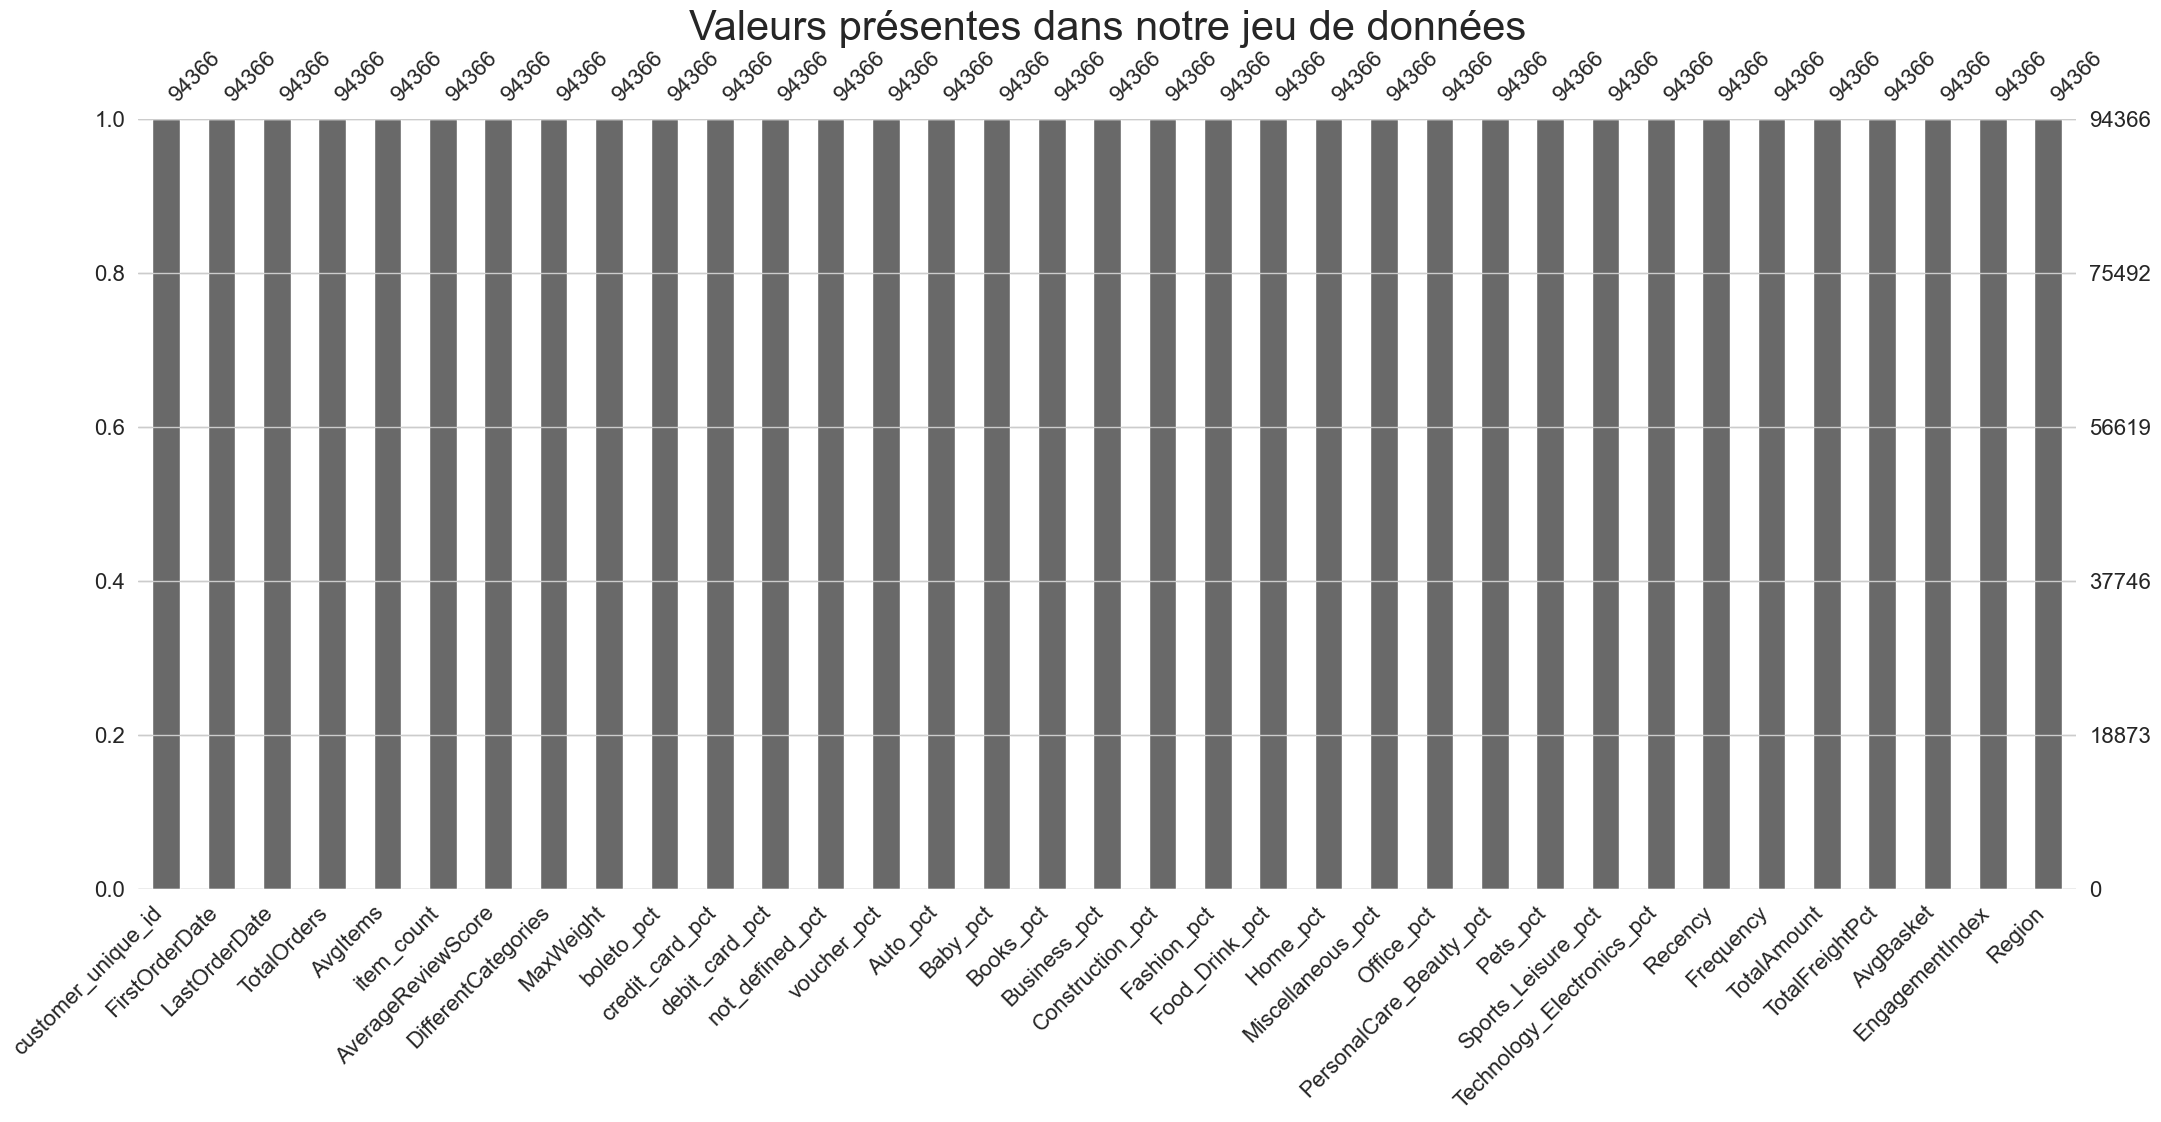

In [82]:
plt.title("Valeurs présentes dans notre jeu de données", fontsize=30)
msno.bar(df)

# Analyse exploratoire

## Analyse univariée

### Variables numériques

In [83]:
df.describe()

,FirstOrderDate,LastOrderDate,TotalOrders,AvgItems,item_count,AverageReviewScore,DifferentCategories,MaxWeight,boleto_pct,credit_card_pct,debit_card_pct,not_defined_pct,voucher_pct,Auto_pct,Baby_pct,Books_pct,Business_pct,Construction_pct,Fashion_pct,Food_Drink_pct,Home_pct,Miscellaneous_pct,Office_pct,PersonalCare_Beauty_pct,Pets_pct,Sports_Leisure_pct,Technology_Electronics_pct,Recency,Frequency,TotalAmount,TotalFreightPct,AvgBasket,EngagementIndex
count,94366,94366,94366.000000,94366.000000,94366.000000,94366.000000,94366.000000,94366.000000,94366.000000,94366.000000,94366.000000,94366.0,94366.000000,94366.000000,94366.000000,94366.000000,94366.000000,94366.000000,94366.000000,94366.000000,94366.000000,94366.000000,94366.000000,94366.000000,94366.000000,94366.000000,94366.000000,94366.000000,94366.000000,94366.000000,94366.000000,94366.000000,94366.000000
mean,2017-12-31 19:05:30.768571136,2018-01-03 11:33:31.591420672,1.033889,1.138326,1.137857,4.103550,1.024765,2160.115667,19.967484,75.513516,1.553354,0.0,2.965646,3.982152,2.892750,0.832427,0.853087,1.446981,9.152777,0.982447,28.713731,5.524925,3.652256,12.197802,1.731426,13.574192,14.463045,242.254223,0.518720,165.861716,20.787427,138.073903,0.619197
min,2016-09-04 21:15:19,2016-09-04 21:15:19,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.501717,9.590000,0.000000,0.850000,0.025000
25%,2017-09-12 18:27:34.249999872,2017-09-16 13:34:45.750000128,1.000000,1.000000,1.000000,4.000000,1.000000,300.000000,0.000000,68.448055,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,118.000000,0.501717,63.100000,11.629790,46.491250,0.500000
50%,2018-01-19 14:59:07.500000,2018-01-22 19:05:05.500000,1.000000,1.000000,1.000000,5.000000,1.000000,700.000000,0.000000,100.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,223.000000,0.501717,107.960000,18.287642,87.500000,0.500000
75%,2018-05-04 21:23:35.249999872,2018-05-07 13:24:41.750000128,1.000000,1.000000,1.000000,5.000000,1.000000,1850.000000,0.000000,100.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,351.000000,0.501717,183.037500,27.410925,149.900000,0.750000
max,2018-08-29 15:00:37,2018-09-03 09:06:57,9.000000,21.000000,21.000000,5.000000,5.000000,40425.000000,100.000000,100.000000,100.000000,0.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,728.000000,4.515453,13664.080000,95.545073,13440.000000,5.250000
std,NaN,NaN,0.205050,0.522514,0.526394,1.325662,0.166853,3826.922130,39.903522,42.522266,12.323927,0.0,15.849245,19.489043,16.644383,9.058085,9.150697,11.849013,28.706379,9.793556,45.036299,22.703439,18.671316,32.613344,12.980035,34.102167,35.067270,153.009381,0.102877,227.038216,12.496679,210.115887,0.240649


In [84]:
# plus aucune valeur dans le not_defined_pct donc on supprime cette colonne
df = df.drop(columns=['not_defined_pct'])

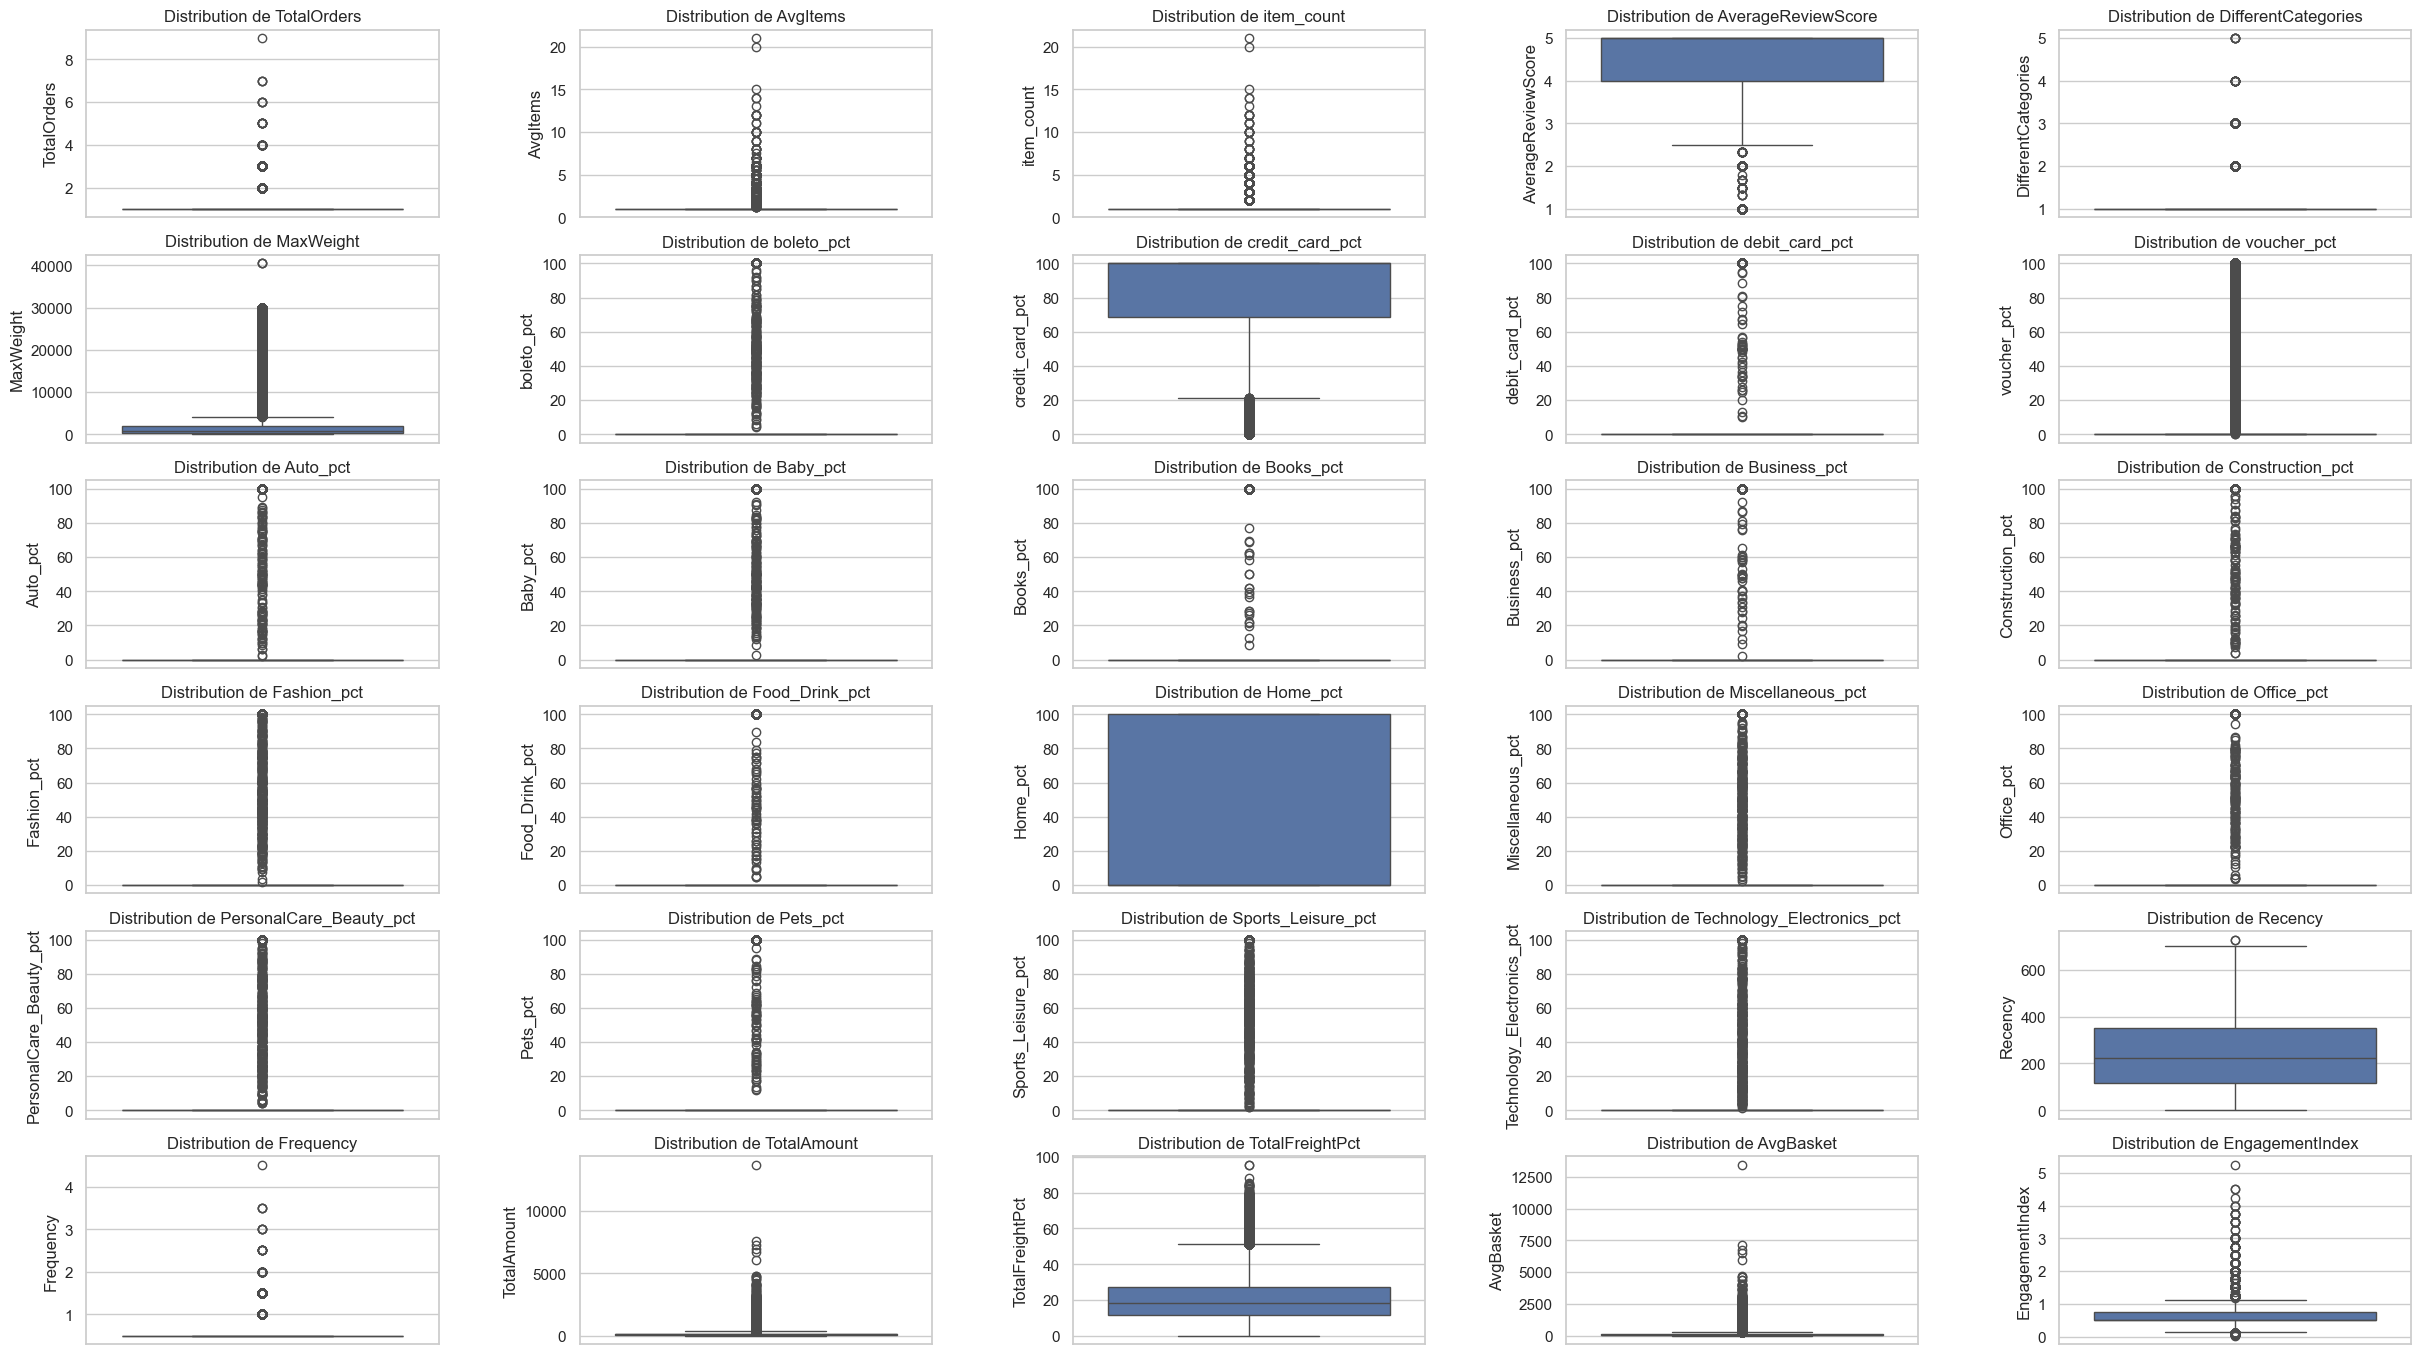

In [85]:
numerics_col = df.select_dtypes(include=['number'])

# Créer une figure avec des sous-graphiques pour chaque colonne numérique
fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(30,20))
axes = axes.flatten()
plt.subplots_adjust(wspace=0.4)

for i, (ax, column) in enumerate(zip(axes.flatten(), numerics_col)):
    sns.boxplot(y=df[column], ax=ax)
    ax.set_title(f'Distribution de {column}')

# Supprimer les axes vides si le nombre de colonnes numériques est inférieur au nombre total d'axes
for j in range(i + 1, 35):
    fig.delaxes(axes.flatten()[j])

plt.show()

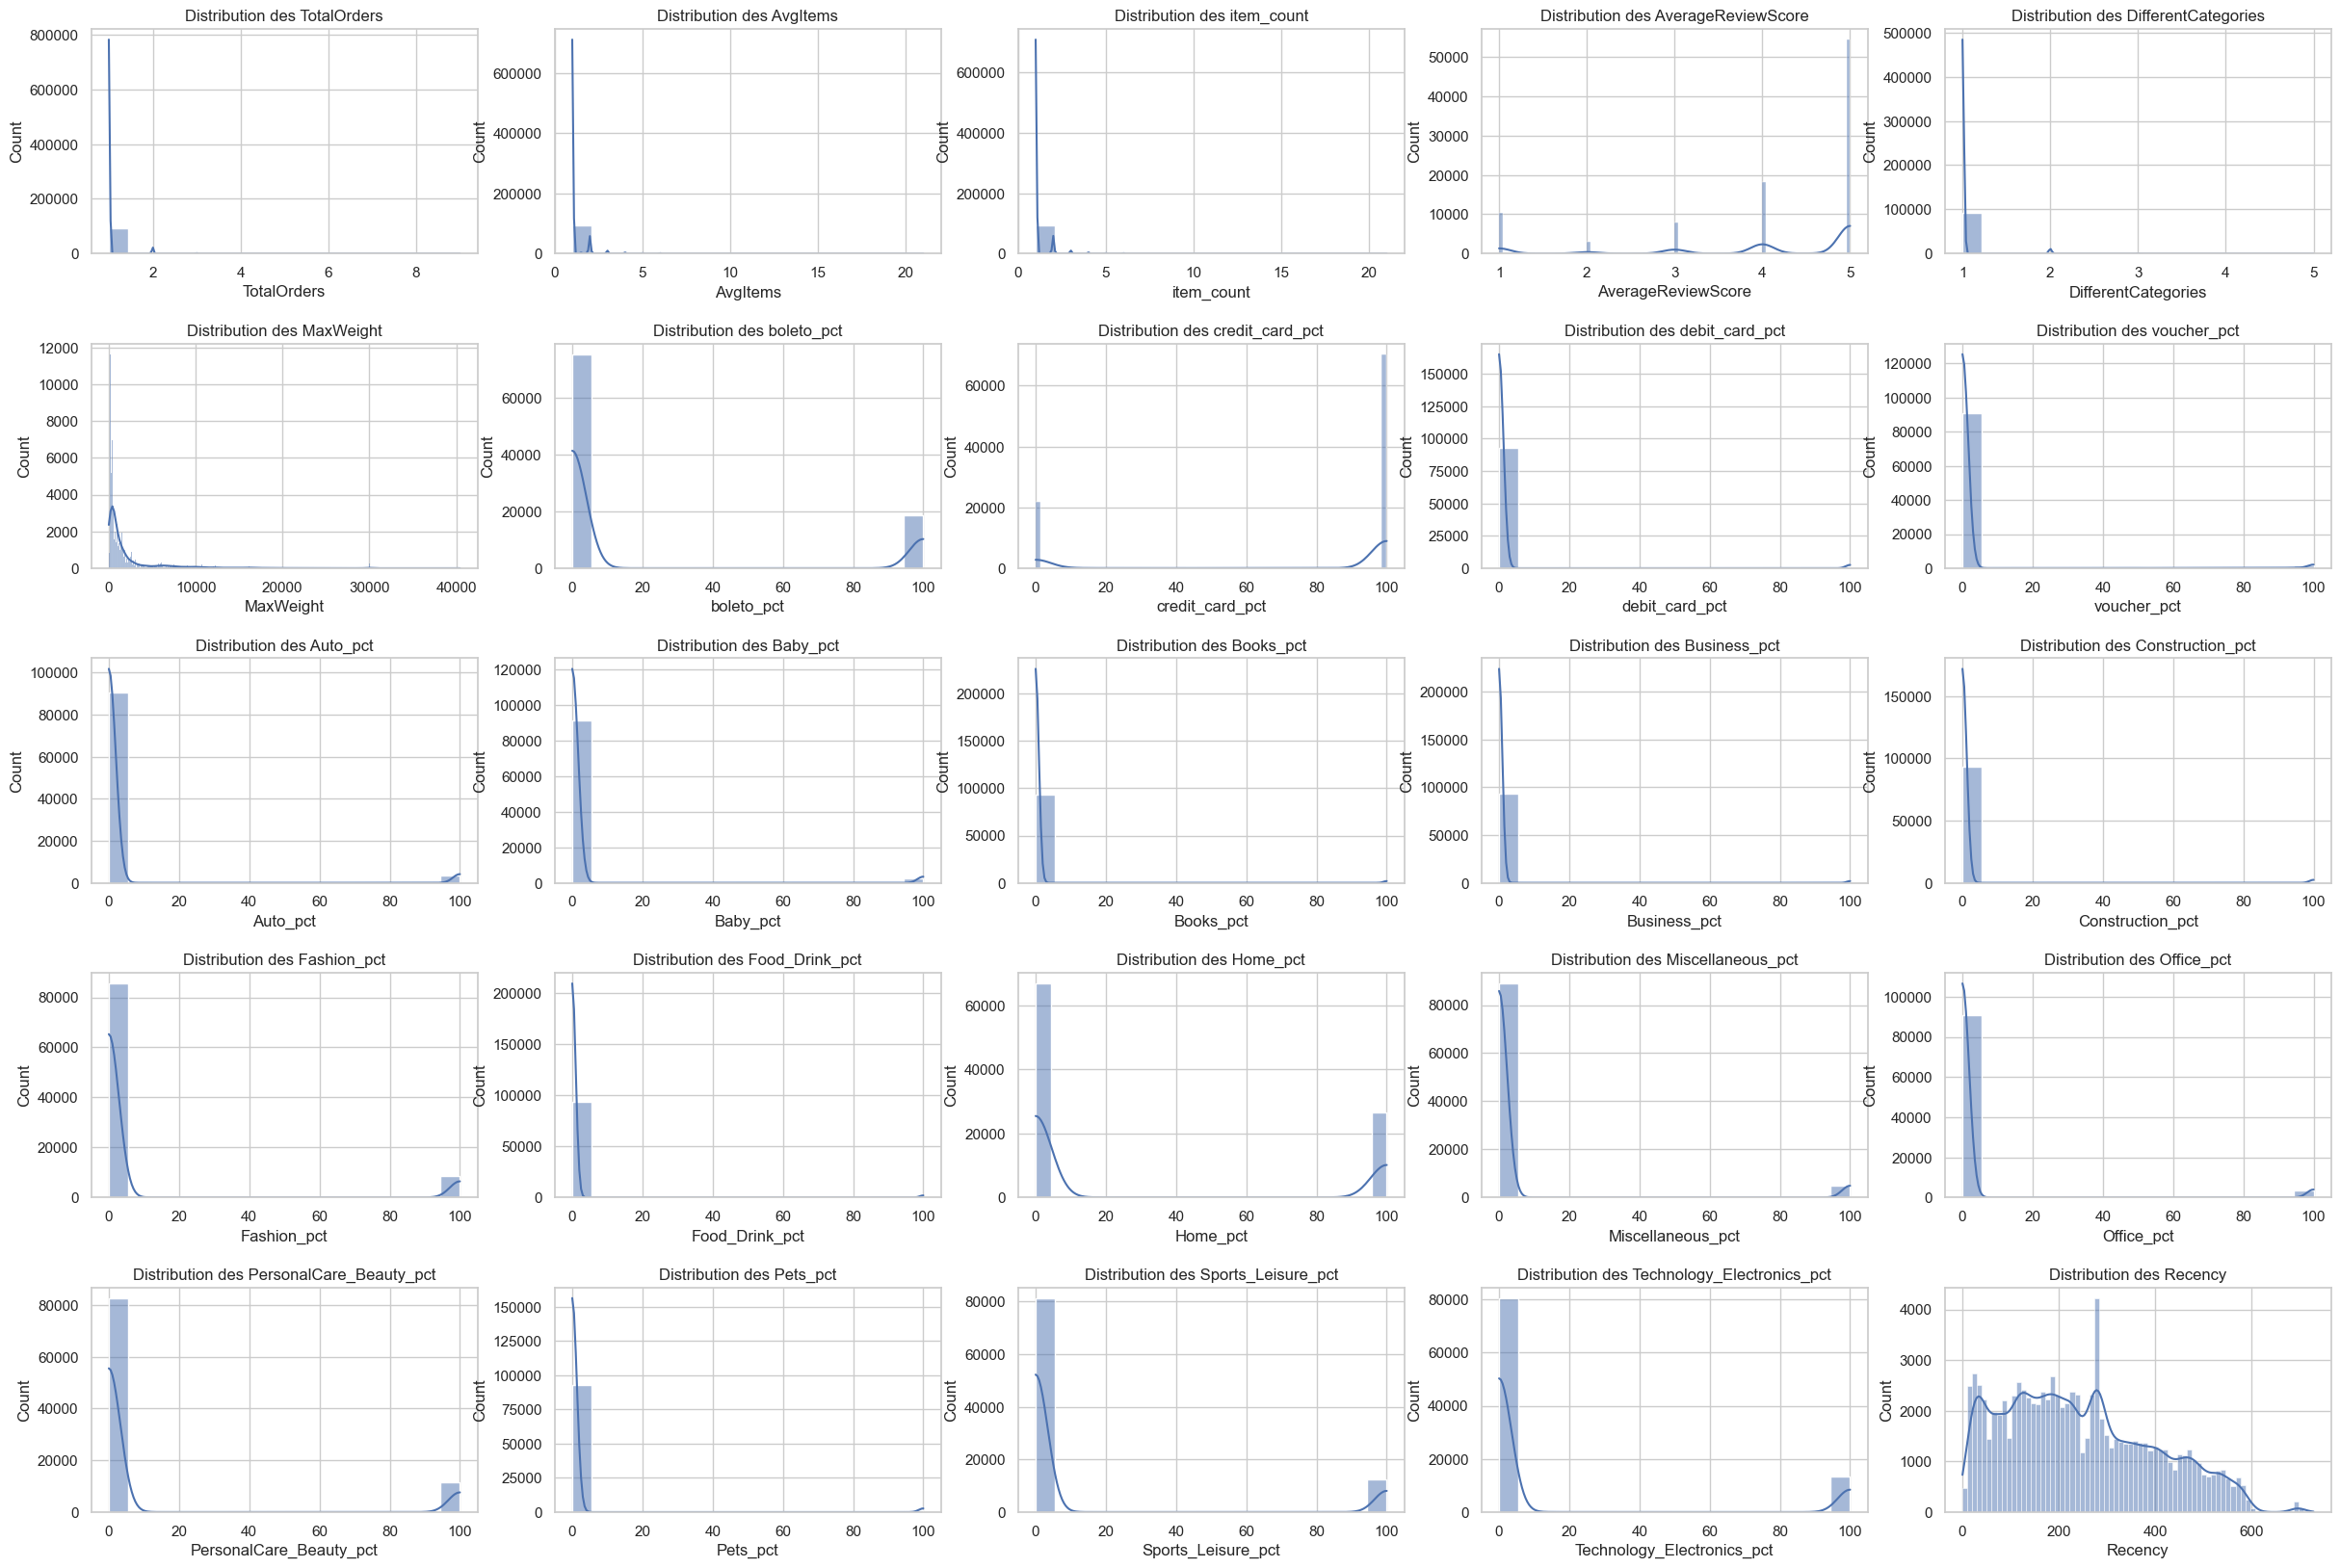

In [86]:
# Créer une figure avec des sous-graphiques pour chaque colonne numérique
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(30,20))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.4)

# Density plot
for i, (ax, column) in enumerate(zip(axes.flatten(), numerics_col)):
    sns.histplot(data=df, x=column, kde=True, ax=ax)
    ax.set_title(f'Distribution des {column}')

# Supprimer les axes vides si le nombre de colonnes numériques est inférieur au nombre total d'axes
for j in range(i + 1, 25):
    fig.delaxes(axes.flatten()[j])

plt.show()

## Analyse bivariée

### Distribution des clients par région, moyen de paiement préféré et catégorie préférée

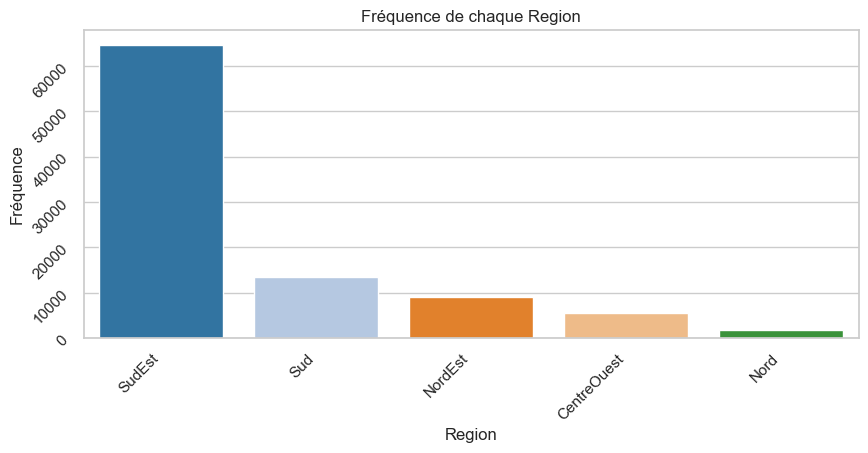

In [87]:
# Compter le nombre d'occurrences pour chaque region
group_counts_region = df['Region'].value_counts().reset_index()
group_counts_region.columns = ['Region', 'Counts']

plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")

# Créer un graphique à barres
sns.barplot(x='Region', y='Counts', data=group_counts_region, hue='Region', palette="tab20", legend=False)

plt.yticks(rotation=45)

# Ajouter des titres et des labels
plt.title('Fréquence de chaque Region')
plt.ylabel('Fréquence')
plt.xlabel('Region')
plt.xticks(rotation=45, ha="right")

plt.show()

### Pairplot

In [88]:
print(numerics_col.columns.tolist())


['TotalOrders', 'AvgItems', 'item_count', 'AverageReviewScore', 'DifferentCategories', 'MaxWeight', 'boleto_pct', 'credit_card_pct', 'debit_card_pct', 'voucher_pct', 'Auto_pct', 'Baby_pct', 'Books_pct', 'Business_pct', 'Construction_pct', 'Fashion_pct', 'Food_Drink_pct', 'Home_pct', 'Miscellaneous_pct', 'Office_pct', 'PersonalCare_Beauty_pct', 'Pets_pct', 'Sports_Leisure_pct', 'Technology_Electronics_pct', 'Recency', 'Frequency', 'TotalAmount', 'TotalFreightPct', 'AvgBasket', 'EngagementIndex']


### Corrélations

#### Variables numériques seulement

In [90]:
# Normalisation des données
scaler = StandardScaler()

df_normalized = df.copy()

# Appliquez la normalisation min-max aux données
df_normalized[numerics_col.columns.tolist()] = scaler.fit_transform(df[numerics_col.columns.tolist()])

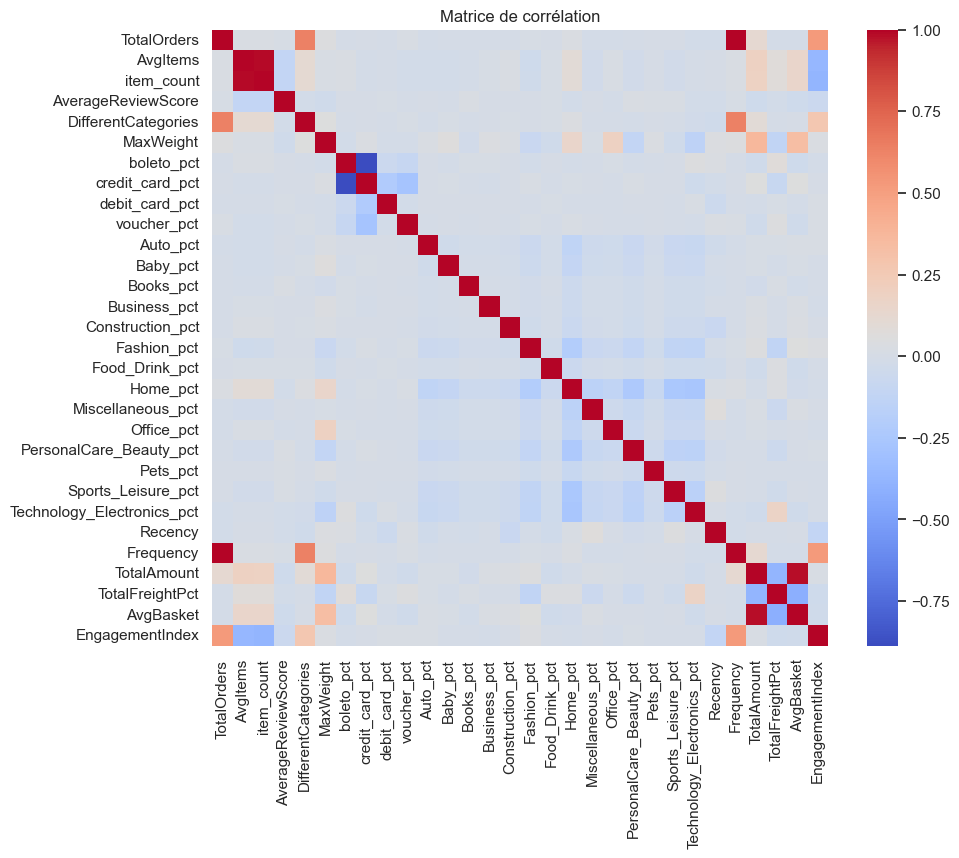

In [91]:
# Calcul de la matrice de corrélation
corr_matrix = df_normalized[numerics_col.columns.tolist()].corr()

# Création d'une heatmap avec seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Titre et affichage du graphique
plt.title('Matrice de corrélation')
plt.show()

#### Toutes les données

In [92]:
# colonnes catégorielles et numériques
categorical_cols = ['Region']
numerical_cols = numerics_col.columns.tolist()

# Création du transformateur avec OneHotEncoder pour les catégorielles et StandardScaler pour les numériques
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# fit_transform
data_processed = preprocessor.fit_transform(df)

# noms des features
numeric_features = list(preprocessor.named_transformers_['num'].get_feature_names_out(numerical_cols))
categorical_features = list(preprocessor.named_transformers_['cat'].get_feature_names_out())
features = numeric_features + categorical_features

# Transformer en DataFrame 
df_processed = pd.DataFrame(data_processed, columns=features)


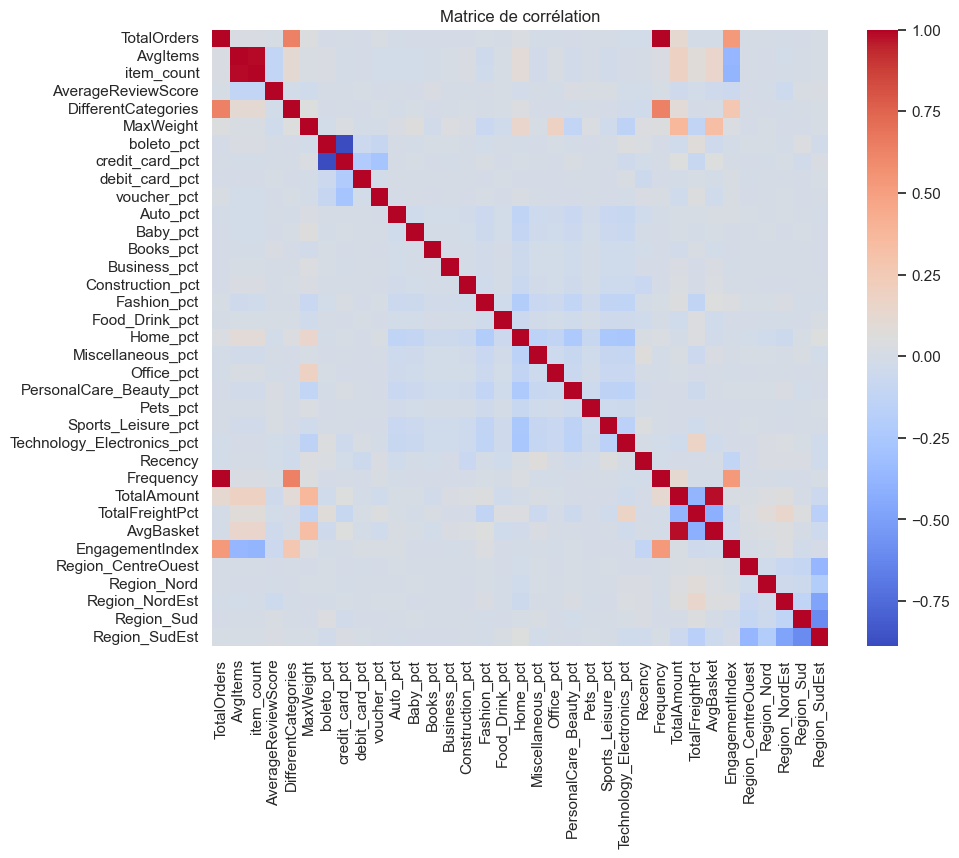

In [93]:
# Calcul de la matrice de corrélation
corr_matrix = df_processed.corr()

# Création d'une heatmap avec seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Titre et affichage du graphique
plt.title('Matrice de corrélation')
plt.show()

## ACP

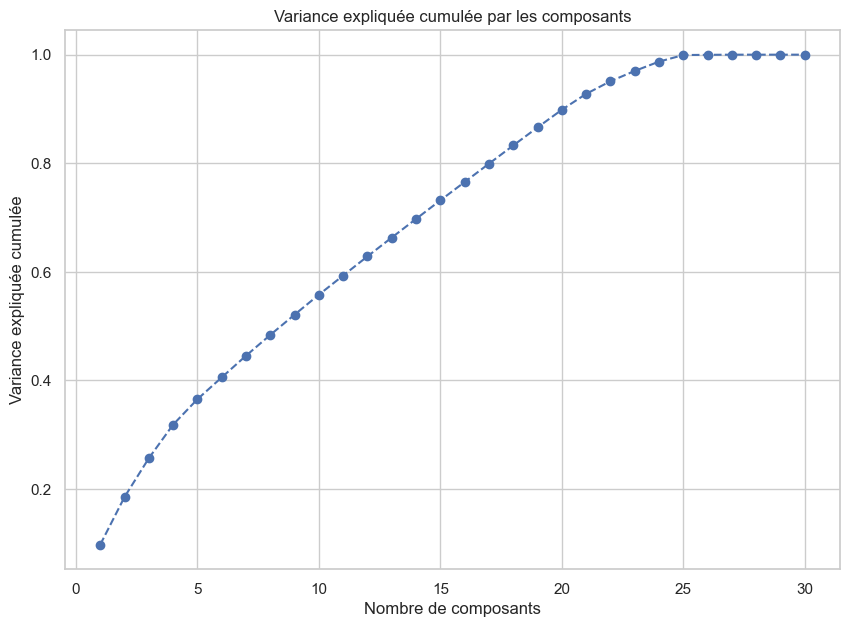

In [94]:
# Création de l'ACP
pca = PCA()

# Application de l'ACP sur les données prétraitées
X_pca = pca.fit_transform(df_normalized[numerical_cols])

# Combien de composants choisir ? Afficher la variance expliquée cumulée
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Variance expliquée cumulée par les composants')
plt.xlabel('Nombre de composants')
plt.ylabel('Variance expliquée cumulée')
plt.show()


In [95]:
# Appliquez la PCA
pca = PCA(n_components=17) 
principal_components = pca.fit_transform(df_normalized[numerical_cols])

# Créez un DataFrame avec les composants principaux
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11',
                                                                'PC12','PC13','PC14','PC15','PC16','PC17'
                                                               ], index=df_normalized.index)


In [96]:
principal_df.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,0.525929,-0.296602,-1.002913,-0.557358,-1.280567,0.194804,-1.086931,0.332182,0.383651,0.717045,-0.210680,-0.284163,-0.137731,-0.086077,-0.060902,0.055848,-0.027080
1,-0.737198,-0.886331,-0.210666,-1.060347,1.065826,-0.078088,-1.537013,-0.793233,-1.727314,0.342430,-0.084994,0.713197,0.108266,0.021048,-0.191816,-0.121430,-0.041000
2,-0.554201,0.077432,-0.449066,-0.491569,-1.049201,0.007364,2.102428,-1.603421,-1.389968,-2.714514,-1.532697,1.668338,-0.383947,-1.515030,-1.038287,0.405397,0.096035
3,-0.591434,-1.395168,0.316346,-0.975034,0.755162,1.727557,1.535140,1.093605,-0.389139,0.462715,-0.137486,0.296118,-0.200670,-0.153615,0.151534,-0.034705,0.098489
4,-0.258824,0.432759,-0.911031,-0.181214,0.553911,1.371915,1.251700,0.841559,-0.382477,0.529052,-0.268257,0.048742,-0.536924,-0.276413,0.499061,0.114484,0.196335


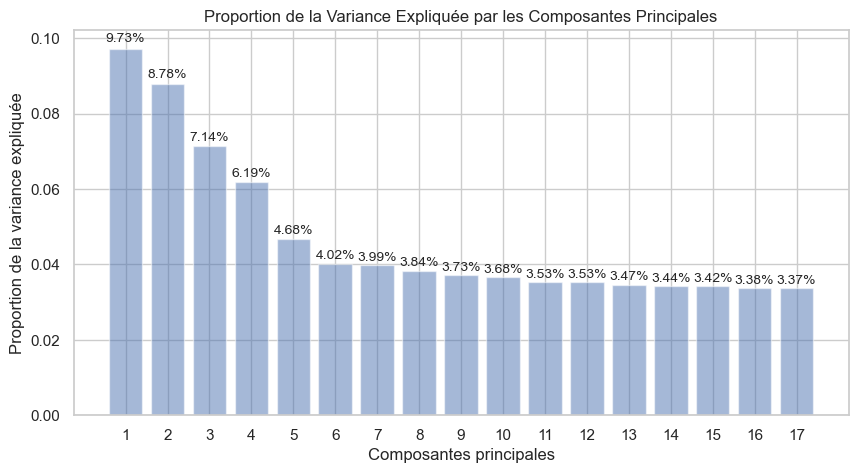

In [97]:
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 5))
bars = plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')

plt.ylabel('Proportion de la variance expliquée')
plt.xlabel('Composantes principales')
plt.title('Proportion de la Variance Expliquée par les Composantes Principales')
plt.xticks(range(1, len(explained_variance) + 1))
# Ajouter le pourcentage au-dessus de chaque barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., 1.01*height, '{0:.2%}'.format(height), ha='center', va='bottom', fontsize=10)

plt.show()

In [98]:
print(f"Explained Variance: {explained_variance.sum()}")

Explained Variance: 0.7991237368847068


In [99]:
components_df = pd.DataFrame(pca.components_, columns=[numerical_cols], index=[f'PC{i+1}' for i in range(pca.n_components_)])
print(components_df)

     TotalOrders  AvgItems item_count AverageReviewScore DifferentCategories  \
PC1     0.539172 -0.000396  -0.004209          -0.021770            0.424535   
PC2    -0.119690  0.385163   0.386614          -0.073673           -0.042302   
PC3     0.130236  0.470165   0.470382          -0.079870            0.174332   
PC4    -0.048077 -0.190151  -0.190325           0.026767           -0.079314   
PC5     0.037108  0.103236   0.104544           0.030545            0.028697   
PC6    -0.040047 -0.046035  -0.047697          -0.145038           -0.046173   
PC7     0.024855 -0.029439  -0.028823          -0.113932            0.013951   
PC8     0.003388 -0.038341  -0.039145          -0.124346           -0.027507   
PC9    -0.026233  0.017626   0.017163           0.011903           -0.012430   
PC10   -0.004648 -0.058114  -0.059260           0.110220           -0.042340   
PC11   -0.011885  0.015538   0.015067          -0.088548            0.003370   
PC12   -0.014589 -0.010066  -0.010516   

# Selection des features

In [100]:
# Concaténation PCA + OHE
df_processed = df_processed.set_index(principal_df.index)
final_df = pd.concat([principal_df, df_processed[categorical_features]], axis=1)

final_df.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,Region_CentreOuest,Region_Nord,Region_NordEst,Region_Sud,Region_SudEst
0,0.525929,-0.296602,-1.002913,-0.557358,-1.280567,0.194804,-1.086931,0.332182,0.383651,0.717045,-0.210680,-0.284163,-0.137731,-0.086077,-0.060902,0.055848,-0.027080,0.0,0.0,0.0,0.0,1.0
1,-0.737198,-0.886331,-0.210666,-1.060347,1.065826,-0.078088,-1.537013,-0.793233,-1.727314,0.342430,-0.084994,0.713197,0.108266,0.021048,-0.191816,-0.121430,-0.041000,0.0,0.0,0.0,0.0,1.0
2,-0.554201,0.077432,-0.449066,-0.491569,-1.049201,0.007364,2.102428,-1.603421,-1.389968,-2.714514,-1.532697,1.668338,-0.383947,-1.515030,-1.038287,0.405397,0.096035,0.0,0.0,0.0,1.0,0.0
3,-0.591434,-1.395168,0.316346,-0.975034,0.755162,1.727557,1.535140,1.093605,-0.389139,0.462715,-0.137486,0.296118,-0.200670,-0.153615,0.151534,-0.034705,0.098489,0.0,1.0,0.0,0.0,0.0
4,-0.258824,0.432759,-0.911031,-0.181214,0.553911,1.371915,1.251700,0.841559,-0.382477,0.529052,-0.268257,0.048742,-0.536924,-0.276413,0.499061,0.114484,0.196335,0.0,0.0,0.0,0.0,1.0


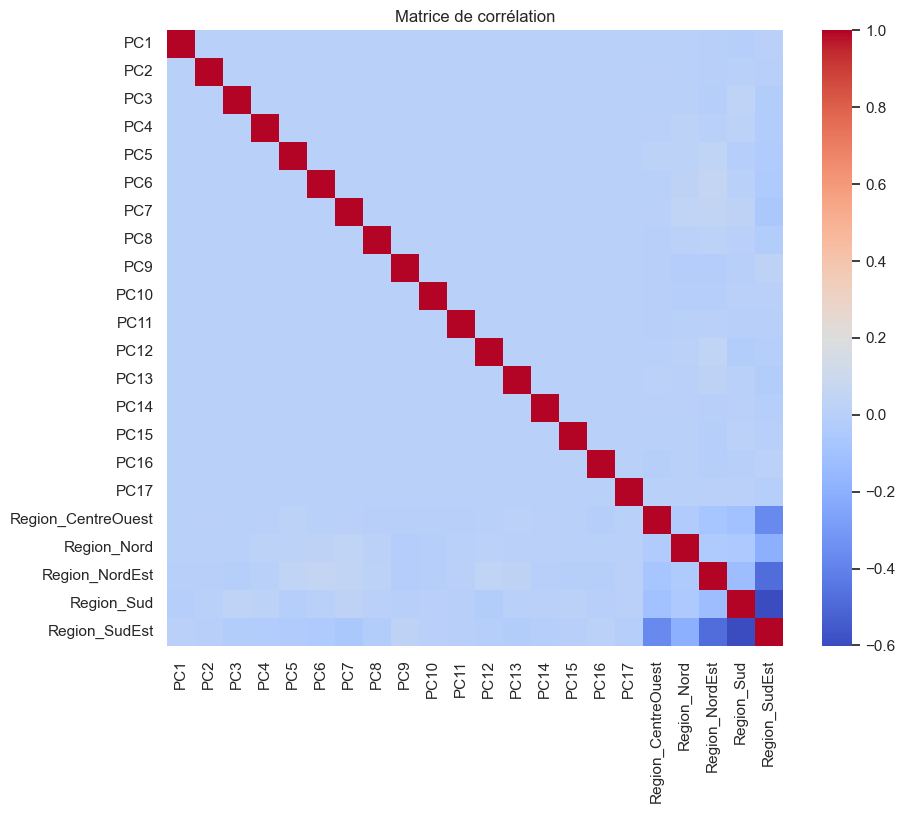

In [101]:
# Calcul de la matrice de corrélation
corr_matrix = final_df.corr()

# Création d'une heatmap avec seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Titre et affichage du graphique
plt.title('Matrice de corrélation')
plt.show()

# Export des données

In [102]:
final_df.shape

(94366, 22)

In [103]:
path     = "data/cleaned/"
filename = "final_df.csv"

In [104]:
final_df.to_csv(path+filename, index=False)